# Task B: NN

## 0. Load the preprocessed data
**We will use the preprocessed dataset after image processing and PCA. It characterizes 2 different classes (tumor or not) based on 200 features.** 

In [1]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd

In [2]:
# Load preprocessed data with help of pickle.
with open('DataAfterProcess/images_AfterProcess.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('DataAfterProcess/label_AfterProcess.pickle', 'rb') as handle:
    y = pickle.load(handle)
    
# Check result.
print(X.shape, y.shape) 

(3000, 400) (3000,)


In [3]:
# Load preprocessed data with help of pickle.
with open('DataAfterProcess/test_images_AfterProcess.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('DataAfterProcess/test_label_AfterProcess.pickle', 'rb') as handle:
    y_test = pickle.load(handle)
    
# Check result.
print(X_test.shape, y_test.shape) 

(200, 400) (200,)


### Training-Validation-Test

**Split data into training set (81%), validation set (9%) and test set (10%). Note that the test set here comes from the dataset.zip file, not the test.zip file.**

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
# Implement one-hot encoding to labels.
y = to_categorical(y)
y_test = to_categorical(y_test)

# Split data into a training set and a test set (90% training and 10% testing data).
# Notice that all random state is chosen as fixed in this assignment to ensure reproducibility.
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size=0.1, random_state=2)

# Check result.
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape) 
print('train set: {} | val set: {} | test set: {}'.format(round(len(y_train)/len(X),3), 
                                                          round(len(y_val)/len(X),3),
                                                          round(len(y_test)/len(X),3)))

(2700, 400) (2700, 4) (300, 400) (300, 4) (200, 400) (200, 4)
train set: 0.9 | val set: 0.1 | test set: 0.067


## 1. Hyperparameter tuning: Trial and error
**In this part, we try to train a neural network and tune the hyperparameter by trial and error, which means we change the hyperparameter of model by checking training and validation loss**

In [6]:
# Import necessary libraries
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import optimizers, losses, metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Define input,output dimension of the NN, they are fixed!
input_units = X_train.shape[1]
output_units = 4

In [8]:
# This function is used to plot traing loss and validation loss.
def plot_loss(training_history):    
    # Set new figure.
    plt.figure(figsize=(8,6))
    plt.grid()    
    
    # Read loss information wrt.loss from input.      
    history_dict = training_history.history

    tra_loss, val_loss = history_dict['loss'], history_dict['val_loss']
    epochs = range(1,len(tra_loss)+1)

    # Plot trainging loss and validation loss.
    plt.plot(epochs,tra_loss, 'bo', label='Training loss') 
    plt.plot(epochs,val_loss, 'b', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

### Formulate initial neural network

**Build a neural network with 3 layers: input layer, hidden layer and output layer.**
- Dense hidden layer with 16 units and relu as activation function;
- Epochs and batch size are chosen as 100 and 128;

In [9]:
# Defeine layer variable
hidden_units_ini = 4

# Define training variable
epochs_ini = 100
batch_size_ini = 128

# Create the model.
model_ini = models.Sequential()
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu', input_shape=[input_units]))
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu'))
model_ini.add(layers.Dense(units=hidden_units_ini, activation='relu'))
model_ini.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_ini.compile(optimizer=optimizers.Adam(),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_ini.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 1604      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
Total params: 1,664
Trainable params: 1,664
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
#  Train the model and evaluate with the validation set in every epoch.
history_ini = model_ini.fit(X_train,
                            y_train,
                            epochs=epochs_ini,
                            batch_size=batch_size_ini,
                            validation_data=(X_val,y_val))

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 0s 183us/sample - loss: 1.3705 - categorical_accuracy: 0.2874 - val_loss: 1.3371 - val_categorical_accuracy: 0.3433
Epoch 2/100
2700/2700 [==============================] - 0s 18us/sample - loss: 1.2906 - categorical_accuracy: 0.3359 - val_loss: 1.2780 - val_categorical_accuracy: 0.3767
Epoch 3/100
2700/2700 [==============================] - 0s 17us/sample - loss: 1.2387 - categorical_accuracy: 0.3685 - val_loss: 1.2288 - val_categorical_accuracy: 0.4033
Epoch 4/100
2700/2700 [==============================] - 0s 16us/sample - loss: 1.1938 - categorical_accuracy: 0.3874 - val_loss: 1.1876 - val_categorical_accuracy: 0.4267
Epoch 5/100
2700/2700 [==============================] - 0s 19us/sample - loss: 1.1526 - categorical_accuracy: 0.4163 - val_loss: 1.1472 - val_categorical_accuracy: 0.4267
Epoch 6/100
2700/2700 [==============================] - 0s 19us/sample - loss: 1.1155 - cat

Epoch 48/100
2700/2700 [==============================] - 0s 15us/sample - loss: 0.2851 - categorical_accuracy: 0.9293 - val_loss: 0.7493 - val_categorical_accuracy: 0.7667
Epoch 49/100
2700/2700 [==============================] - 0s 16us/sample - loss: 0.2756 - categorical_accuracy: 0.9326 - val_loss: 0.7587 - val_categorical_accuracy: 0.7767
Epoch 50/100
2700/2700 [==============================] - 0s 15us/sample - loss: 0.2677 - categorical_accuracy: 0.9333 - val_loss: 0.7668 - val_categorical_accuracy: 0.7800
Epoch 51/100
2700/2700 [==============================] - 0s 17us/sample - loss: 0.2611 - categorical_accuracy: 0.9348 - val_loss: 0.7710 - val_categorical_accuracy: 0.7733
Epoch 52/100
2700/2700 [==============================] - 0s 16us/sample - loss: 0.2544 - categorical_accuracy: 0.9370 - val_loss: 0.7746 - val_categorical_accuracy: 0.7767
Epoch 53/100
2700/2700 [==============================] - 0s 16us/sample - loss: 0.2480 - categorical_accuracy: 0.9381 - val_loss: 0.77

2700/2700 [==============================] - 0s 15us/sample - loss: 0.1731 - categorical_accuracy: 0.9481 - val_loss: 0.9437 - val_categorical_accuracy: 0.7900
Epoch 96/100
2700/2700 [==============================] - 0s 16us/sample - loss: 0.1696 - categorical_accuracy: 0.9485 - val_loss: 0.9316 - val_categorical_accuracy: 0.7967
Epoch 97/100
2700/2700 [==============================] - 0s 13us/sample - loss: 0.1683 - categorical_accuracy: 0.9474 - val_loss: 0.9474 - val_categorical_accuracy: 0.7933
Epoch 98/100
2700/2700 [==============================] - 0s 15us/sample - loss: 0.1662 - categorical_accuracy: 0.9489 - val_loss: 0.9499 - val_categorical_accuracy: 0.7900
Epoch 99/100
2700/2700 [==============================] - 0s 14us/sample - loss: 0.1649 - categorical_accuracy: 0.9485 - val_loss: 0.9500 - val_categorical_accuracy: 0.7933
Epoch 100/100
2700/2700 [==============================] - 0s 16us/sample - loss: 0.1640 - categorical_accuracy: 0.9493 - val_loss: 0.9461 - val_cat

### Model validation
**Evaluate the model per validation set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

300/300 [==============================] - 0s 40us/sample - loss: 0.9461 - categorical_accuracy: 0.7900
[0.9460626824696858, 0.79]


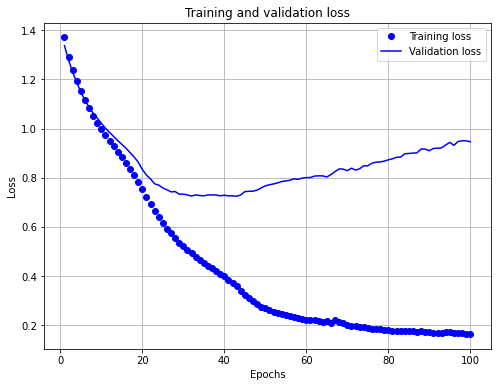

In [11]:
# Plot traing loss and validation loss
plot_loss(history_ini)

# Evaluate model by using validation set.
print(model_ini.evaluate(X_val,y_val))

### Formulate modified neural network
**According to the previous result, we modify the network deeper (more hidden layers) and bigger (more hidden units). To avoid the overfitting, the l2 regularization and drop out layer are also considered.**

In [9]:
# Defeine new layer variable. 
hidden_units_complex = 256
C_complex = 0.002
dropout_ratio_complex = 0.2

# Define training variable
epochs_complex = 200
batch_size_complex = 128

# Create the new model with l2 regularization and drop out layer.
model_complex = models.Sequential()
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex), input_shape=[input_units]))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=hidden_units_complex, activation='relu', 
                               kernel_regularizer=regularizers.l2(C_complex)))
model_complex.add(layers.Dropout(dropout_ratio_complex))
model_complex.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_complex.compile(optimizer=optimizers.Adam(),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_complex.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               102656    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

In [10]:
#  Train the model and evaluate with the validation set in every epoch.
history_complex = model_complex.fit(X_train,
                                    y_train,
                                    epochs=epochs_complex,
                                    batch_size=batch_size_complex,
                                    validation_data=(X_val,y_val))

Train on 2700 samples, validate on 300 samples
Epoch 1/200
2700/2700 [==============================] - 1s 342us/sample - loss: 3.6413 - categorical_accuracy: 0.4689 - val_loss: 3.0541 - val_categorical_accuracy: 0.6833
Epoch 2/200
2700/2700 [==============================] - 0s 61us/sample - loss: 2.8315 - categorical_accuracy: 0.7207 - val_loss: 2.4209 - val_categorical_accuracy: 0.8100
Epoch 3/200
2700/2700 [==============================] - 0s 51us/sample - loss: 2.3060 - categorical_accuracy: 0.8452 - val_loss: 2.0925 - val_categorical_accuracy: 0.8633
Epoch 4/200
2700/2700 [==============================] - 0s 52us/sample - loss: 1.9897 - categorical_accuracy: 0.8996 - val_loss: 1.9454 - val_categorical_accuracy: 0.8767
Epoch 5/200
2700/2700 [==============================] - 0s 50us/sample - loss: 1.7344 - categorical_accuracy: 0.9300 - val_loss: 1.7209 - val_categorical_accuracy: 0.9100
Epoch 6/200
2700/2700 [==============================] - 0s 51us/sample - loss: 1.5410 - cat

2700/2700 [==============================] - 0s 53us/sample - loss: 0.1303 - categorical_accuracy: 0.9963 - val_loss: 0.3093 - val_categorical_accuracy: 0.9400
Epoch 96/200
2700/2700 [==============================] - 0s 52us/sample - loss: 0.1263 - categorical_accuracy: 0.9974 - val_loss: 0.3458 - val_categorical_accuracy: 0.9300
Epoch 97/200
2700/2700 [==============================] - 0s 53us/sample - loss: 0.1229 - categorical_accuracy: 0.9959 - val_loss: 0.2933 - val_categorical_accuracy: 0.9400
Epoch 98/200
2700/2700 [==============================] - 0s 53us/sample - loss: 0.1167 - categorical_accuracy: 0.9978 - val_loss: 0.2798 - val_categorical_accuracy: 0.9500
Epoch 99/200
2700/2700 [==============================] - 0s 58us/sample - loss: 0.1113 - categorical_accuracy: 0.9981 - val_loss: 0.2774 - val_categorical_accuracy: 0.9333
Epoch 100/200
2700/2700 [==============================] - 0s 61us/sample - loss: 0.1082 - categorical_accuracy: 0.9989 - val_loss: 0.3341 - val_cat

2700/2700 [==============================] - 0s 70us/sample - loss: 0.0811 - categorical_accuracy: 0.9978 - val_loss: 0.3012 - val_categorical_accuracy: 0.9300
Epoch 190/200
2700/2700 [==============================] - 0s 69us/sample - loss: 0.0782 - categorical_accuracy: 0.9993 - val_loss: 0.3244 - val_categorical_accuracy: 0.9367
Epoch 191/200
2700/2700 [==============================] - 0s 74us/sample - loss: 0.0779 - categorical_accuracy: 0.9978 - val_loss: 0.3045 - val_categorical_accuracy: 0.9367
Epoch 192/200
2700/2700 [==============================] - 0s 77us/sample - loss: 0.0798 - categorical_accuracy: 0.9974 - val_loss: 0.3124 - val_categorical_accuracy: 0.9433
Epoch 193/200
2700/2700 [==============================] - 0s 69us/sample - loss: 0.0826 - categorical_accuracy: 0.9974 - val_loss: 0.3437 - val_categorical_accuracy: 0.9433
Epoch 194/200
2700/2700 [==============================] - 0s 63us/sample - loss: 0.1045 - categorical_accuracy: 0.9919 - val_loss: 0.3176 - val

### Model validation
**Evaluate the model per validation set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

300/300 [==============================] - 0s 70us/sample - loss: 0.3601 - categorical_accuracy: 0.9400
[0.36011161108811696, 0.94]


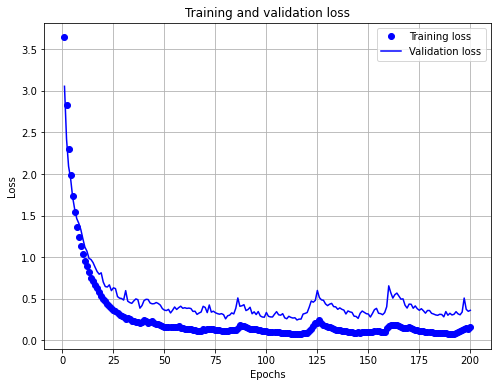

In [12]:
# Plot traing loss and validation loss
plot_loss(history_complex)

# Evaluate model by using validation set.
print(model_complex.evaluate(X_val,y_val))

## 2. Hyperparameter tuning: GridsearchCV 
**Let's also try to tune the hyper-parameters of neural network with help of GridsearchCV(). We tune number of hidden units, drop out ratio and regularization parameter.**

### Implement GrisearchCV

In [30]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [31]:
# This function is used to build and compile model with genreal number of hidden units, drop out ratio and regularzation parameter  
def create_model(hidden_units=16, dropout_ratio=0.2, C=0.02):
    # Create the model.
    model = models.Sequential()    
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C), input_shape=[input_units]))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=hidden_units, activation='relu', 
                           kernel_regularizer=regularizers.l2(C)))
    model.add(layers.Dropout(dropout_ratio))
    model.add(layers.Dense(units=output_units, activation='softmax'))

    # Configure the model with optimizer, loss function and metrics.
    model.compile(optimizer=optimizers.Adam(),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model


# Create a model wrapper with help of KerasClassifier().
model_grid = KerasClassifier(build_fn=create_model, epochs=200,batch_size=128, verbose=1)

In [34]:
# Create a dictionary called param_grid and fill out some parameters for hidden units, C and drop out ratio.
hidden_units_grid = [128,256]
C_grid = [0.002,0.02]
dropout_ratio_grid = [0.2,0.5]

param_grid = dict(hidden_units=hidden_units_grid,
                  C=C_grid,
                  dropout_ratio=dropout_ratio_grid)

In [35]:
# Create a GridSearchCV() object and fit it to the training data, also evaluate with validation data.
grid = GridSearchCV(model_grid, param_grid=param_grid)
grid_result = grid.fit(X_train,
                       y_train,
                       validation_data=(X_val,y_val))

Train on 2160 samples, validate on 300 samples
Epoch 1/200
2160/2160 [==============================] - 1s 383us/sample - loss: 2.6563 - accuracy: 0.3806 - val_loss: 2.4325 - val_accuracy: 0.5333
Epoch 2/200
2160/2160 [==============================] - 0s 49us/sample - loss: 2.2863 - accuracy: 0.5347 - val_loss: 2.0119 - val_accuracy: 0.6400
Epoch 3/200
2160/2160 [==============================] - 0s 47us/sample - loss: 1.9052 - accuracy: 0.6843 - val_loss: 1.6628 - val_accuracy: 0.7700
Epoch 4/200
2160/2160 [==============================] - 0s 44us/sample - loss: 1.6304 - accuracy: 0.7898 - val_loss: 1.5012 - val_accuracy: 0.8200
Epoch 5/200
2160/2160 [==============================] - 0s 41us/sample - loss: 1.4189 - accuracy: 0.8370 - val_loss: 1.3507 - val_accuracy: 0.8467
Epoch 6/200
2160/2160 [==============================] - 0s 40us/sample - loss: 1.2374 - accuracy: 0.8963 - val_loss: 1.2719 - val_accuracy: 0.8800
Epoch 7/200
2160/2160 [==============================] - 0s 36us

Epoch 56/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1504 - accuracy: 0.9991 - val_loss: 0.4830 - val_accuracy: 0.9133
Epoch 57/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1521 - accuracy: 0.9949 - val_loss: 0.4602 - val_accuracy: 0.9100
Epoch 58/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1507 - accuracy: 0.9949 - val_loss: 0.4932 - val_accuracy: 0.9067
Epoch 59/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1484 - accuracy: 0.9977 - val_loss: 0.5008 - val_accuracy: 0.9067
Epoch 60/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1452 - accuracy: 0.9963 - val_loss: 0.5234 - val_accuracy: 0.9000
Epoch 61/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1424 - accuracy: 0.9958 - val_loss: 0.5433 - val_accuracy: 0.9000
Epoch 62/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1431 - accuracy: 0.9944

Epoch 111/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1097 - accuracy: 0.9963 - val_loss: 0.4681 - val_accuracy: 0.9067
Epoch 112/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1085 - accuracy: 0.9968 - val_loss: 0.4453 - val_accuracy: 0.9067
Epoch 113/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1089 - accuracy: 0.9958 - val_loss: 0.4203 - val_accuracy: 0.9100
Epoch 114/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1010 - accuracy: 0.9986 - val_loss: 0.4482 - val_accuracy: 0.9100
Epoch 115/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1076 - accuracy: 0.9949 - val_loss: 0.4650 - val_accuracy: 0.9000
Epoch 116/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1059 - accuracy: 0.9949 - val_loss: 0.4405 - val_accuracy: 0.9100
Epoch 117/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1043 - accuracy:

Epoch 19/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.5624 - accuracy: 0.9870 - val_loss: 0.8340 - val_accuracy: 0.9067
Epoch 20/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.5344 - accuracy: 0.9907 - val_loss: 0.8117 - val_accuracy: 0.9000
Epoch 21/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5142 - accuracy: 0.9912 - val_loss: 0.7800 - val_accuracy: 0.9067
Epoch 22/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.4930 - accuracy: 0.9912 - val_loss: 0.7648 - val_accuracy: 0.8967
Epoch 23/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.4724 - accuracy: 0.9898 - val_loss: 0.7285 - val_accuracy: 0.9067
Epoch 24/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.4470 - accuracy: 0.9931 - val_loss: 0.7103 - val_accuracy: 0.9067
Epoch 25/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.4246 - accuracy: 0.9949

Epoch 74/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1219 - accuracy: 0.9977 - val_loss: 0.4098 - val_accuracy: 0.9267
Epoch 75/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1234 - accuracy: 0.9944 - val_loss: 0.3754 - val_accuracy: 0.9267
Epoch 76/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.1191 - accuracy: 0.9981 - val_loss: 0.4104 - val_accuracy: 0.9300
Epoch 77/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1165 - accuracy: 0.9972 - val_loss: 0.3602 - val_accuracy: 0.9333
Epoch 78/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1131 - accuracy: 0.9986 - val_loss: 0.3577 - val_accuracy: 0.9200
Epoch 79/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1168 - accuracy: 0.9958 - val_loss: 0.3441 - val_accuracy: 0.9333
Epoch 80/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1136 - accuracy: 0.9968

Epoch 129/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.0866 - accuracy: 0.9986 - val_loss: 0.4102 - val_accuracy: 0.9033
Epoch 130/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.0856 - accuracy: 0.9981 - val_loss: 0.3374 - val_accuracy: 0.9267
Epoch 131/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.0887 - accuracy: 0.9963 - val_loss: 0.3229 - val_accuracy: 0.9267
Epoch 132/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.0893 - accuracy: 0.9958 - val_loss: 0.3990 - val_accuracy: 0.9200
Epoch 133/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.0957 - accuracy: 0.9954 - val_loss: 0.3358 - val_accuracy: 0.9367
Epoch 134/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.0982 - accuracy: 0.9954 - val_loss: 0.3924 - val_accuracy: 0.9267
Epoch 135/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1035 - accuracy:

Epoch 37/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.2597 - accuracy: 0.9954 - val_loss: 0.5360 - val_accuracy: 0.9200
Epoch 38/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2491 - accuracy: 0.9958 - val_loss: 0.5637 - val_accuracy: 0.9167
Epoch 39/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.2380 - accuracy: 0.9949 - val_loss: 0.5722 - val_accuracy: 0.9133
Epoch 40/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.2322 - accuracy: 0.9972 - val_loss: 0.5452 - val_accuracy: 0.9200
Epoch 41/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.2271 - accuracy: 0.9949 - val_loss: 0.5428 - val_accuracy: 0.9100
Epoch 42/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.2188 - accuracy: 0.9954 - val_loss: 0.5138 - val_accuracy: 0.9267
Epoch 43/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.2104 - accuracy: 0.9963

Epoch 92/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1055 - accuracy: 0.9986 - val_loss: 0.3578 - val_accuracy: 0.9300
Epoch 93/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1021 - accuracy: 0.9995 - val_loss: 0.3362 - val_accuracy: 0.9333
Epoch 94/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1014 - accuracy: 0.9972 - val_loss: 0.3316 - val_accuracy: 0.9367
Epoch 95/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.1006 - accuracy: 0.9972 - val_loss: 0.3593 - val_accuracy: 0.9300
Epoch 96/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.0993 - accuracy: 0.9968 - val_loss: 0.3656 - val_accuracy: 0.9300
Epoch 97/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.0974 - accuracy: 0.9977 - val_loss: 0.3744 - val_accuracy: 0.9167
Epoch 98/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.0940 - accuracy: 0.9981

Epoch 147/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1034 - accuracy: 0.9968 - val_loss: 0.4004 - val_accuracy: 0.9200
Epoch 148/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.0997 - accuracy: 0.9977 - val_loss: 0.3597 - val_accuracy: 0.9233
Epoch 149/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.0994 - accuracy: 0.9972 - val_loss: 0.3733 - val_accuracy: 0.9167
Epoch 150/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1003 - accuracy: 0.9954 - val_loss: 0.3378 - val_accuracy: 0.9233
Epoch 151/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.0966 - accuracy: 0.9977 - val_loss: 0.3537 - val_accuracy: 0.9233
Epoch 152/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.0937 - accuracy: 0.9986 - val_loss: 0.3790 - val_accuracy: 0.9200
Epoch 153/200
2160/2160 [==============================] - 0s 29us/sample - loss: 0.0926 - accuracy:

Epoch 55/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1604 - accuracy: 0.9963 - val_loss: 0.5116 - val_accuracy: 0.9133
Epoch 56/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1511 - accuracy: 0.9977 - val_loss: 0.4751 - val_accuracy: 0.9000
Epoch 57/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.1542 - accuracy: 0.9954 - val_loss: 0.5075 - val_accuracy: 0.8933
Epoch 58/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1460 - accuracy: 0.9981 - val_loss: 0.4542 - val_accuracy: 0.8900
Epoch 59/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.1422 - accuracy: 0.9977 - val_loss: 0.5085 - val_accuracy: 0.8967
Epoch 60/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.1407 - accuracy: 0.9958 - val_loss: 0.4549 - val_accuracy: 0.9033
Epoch 61/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1360 - accuracy: 0.9986

Epoch 110/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.0885 - accuracy: 0.9977 - val_loss: 0.4668 - val_accuracy: 0.9133
Epoch 111/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.0896 - accuracy: 0.9977 - val_loss: 0.4402 - val_accuracy: 0.9033
Epoch 112/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.0912 - accuracy: 0.9972 - val_loss: 0.4462 - val_accuracy: 0.9133
Epoch 113/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.0896 - accuracy: 0.9972 - val_loss: 0.4235 - val_accuracy: 0.9133
Epoch 114/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.0877 - accuracy: 0.9977 - val_loss: 0.4567 - val_accuracy: 0.9000
Epoch 115/200
2160/2160 [==============================] - 0s 28us/sample - loss: 0.0853 - accuracy: 0.9986 - val_loss: 0.4608 - val_accuracy: 0.9100
Epoch 116/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.0872 - accuracy:

Epoch 18/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5696 - accuracy: 0.9875 - val_loss: 0.8774 - val_accuracy: 0.9100
Epoch 19/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5494 - accuracy: 0.9917 - val_loss: 0.8705 - val_accuracy: 0.9067
Epoch 20/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5374 - accuracy: 0.9875 - val_loss: 0.8582 - val_accuracy: 0.9133
Epoch 21/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.4983 - accuracy: 0.9944 - val_loss: 0.7786 - val_accuracy: 0.9167
Epoch 22/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.4780 - accuracy: 0.9935 - val_loss: 0.8028 - val_accuracy: 0.8933
Epoch 23/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.4514 - accuracy: 0.9972 - val_loss: 0.7931 - val_accuracy: 0.9167
Epoch 24/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.4292 - accuracy: 0.9954

Epoch 73/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.1183 - accuracy: 0.9986 - val_loss: 0.4597 - val_accuracy: 0.9133
Epoch 74/200
2160/2160 [==============================] - 0s 30us/sample - loss: 0.1184 - accuracy: 0.9968 - val_loss: 0.3955 - val_accuracy: 0.9233
Epoch 75/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1205 - accuracy: 0.9954 - val_loss: 0.4128 - val_accuracy: 0.9167
Epoch 76/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1149 - accuracy: 0.9968 - val_loss: 0.4449 - val_accuracy: 0.9133
Epoch 77/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1166 - accuracy: 0.9968 - val_loss: 0.4679 - val_accuracy: 0.8933
Epoch 78/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1151 - accuracy: 0.9968 - val_loss: 0.4283 - val_accuracy: 0.9067
Epoch 79/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1161 - accuracy: 0.9963

Epoch 128/200
2160/2160 [==============================] - 0s 29us/sample - loss: 0.0969 - accuracy: 0.9940 - val_loss: 0.3853 - val_accuracy: 0.9367
Epoch 129/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.0936 - accuracy: 0.9972 - val_loss: 0.4232 - val_accuracy: 0.9200
Epoch 130/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.0969 - accuracy: 0.9963 - val_loss: 0.3897 - val_accuracy: 0.9200
Epoch 131/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.0976 - accuracy: 0.9949 - val_loss: 0.3710 - val_accuracy: 0.9167
Epoch 132/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.0994 - accuracy: 0.9954 - val_loss: 0.3853 - val_accuracy: 0.9167
Epoch 133/200
2160/2160 [==============================] - 0s 30us/sample - loss: 0.0984 - accuracy: 0.9972 - val_loss: 0.3739 - val_accuracy: 0.9067
Epoch 134/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.0988 - accuracy:

2160/2160 [==============================] - 0s 50us/sample - loss: 0.2428 - accuracy: 0.9935 - val_loss: 0.5828 - val_accuracy: 0.9167
Epoch 37/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.2379 - accuracy: 0.9921 - val_loss: 0.5558 - val_accuracy: 0.9200
Epoch 38/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2254 - accuracy: 0.9954 - val_loss: 0.5488 - val_accuracy: 0.9067
Epoch 39/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2159 - accuracy: 0.9963 - val_loss: 0.5229 - val_accuracy: 0.9000
Epoch 40/200
2160/2160 [==============================] - 0s 49us/sample - loss: 0.2097 - accuracy: 0.9954 - val_loss: 0.5187 - val_accuracy: 0.9133
Epoch 41/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1985 - accuracy: 0.9968 - val_loss: 0.5066 - val_accuracy: 0.9167
Epoch 42/200
2160/2160 [==============================] - 0s 47us/sample - loss: 0.1955 - accuracy: 0.9944 - val_loss: 

2160/2160 [==============================] - 0s 54us/sample - loss: 0.0839 - accuracy: 0.9991 - val_loss: 0.3647 - val_accuracy: 0.9267
Epoch 92/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.0814 - accuracy: 0.9995 - val_loss: 0.3749 - val_accuracy: 0.9233
Epoch 93/200
2160/2160 [==============================] - 0s 50us/sample - loss: 0.0791 - accuracy: 0.9991 - val_loss: 0.3506 - val_accuracy: 0.9167
Epoch 94/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.0798 - accuracy: 0.9981 - val_loss: 0.3738 - val_accuracy: 0.9233
Epoch 95/200
2160/2160 [==============================] - 0s 48us/sample - loss: 0.0803 - accuracy: 0.9986 - val_loss: 0.4364 - val_accuracy: 0.9100
Epoch 96/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.0897 - accuracy: 0.9954 - val_loss: 0.4006 - val_accuracy: 0.9033
Epoch 97/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.1046 - accuracy: 0.9935 - val_loss: 

Epoch 146/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.1623 - accuracy: 0.9810 - val_loss: 0.5753 - val_accuracy: 0.8833
Epoch 147/200
2160/2160 [==============================] - 0s 48us/sample - loss: 0.2132 - accuracy: 0.9736 - val_loss: 0.5092 - val_accuracy: 0.8867
Epoch 148/200
2160/2160 [==============================] - 0s 49us/sample - loss: 0.1861 - accuracy: 0.9843 - val_loss: 0.4724 - val_accuracy: 0.9133
Epoch 149/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.2008 - accuracy: 0.9782 - val_loss: 0.5417 - val_accuracy: 0.8933
Epoch 150/200
2160/2160 [==============================] - 0s 48us/sample - loss: 0.2017 - accuracy: 0.9833 - val_loss: 0.7071 - val_accuracy: 0.8767
Epoch 151/200
2160/2160 [==============================] - 0s 49us/sample - loss: 0.1990 - accuracy: 0.9917 - val_loss: 0.6356 - val_accuracy: 0.9067
Epoch 152/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1921 - accuracy:

2160/2160 [==============================] - 0s 55us/sample - loss: 0.1548 - accuracy: 0.9958 - val_loss: 0.3752 - val_accuracy: 0.9333
Epoch 55/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1655 - accuracy: 0.9884 - val_loss: 0.3582 - val_accuracy: 0.9400
Epoch 56/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.1603 - accuracy: 0.9931 - val_loss: 0.3643 - val_accuracy: 0.9400
Epoch 57/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1515 - accuracy: 0.9958 - val_loss: 0.4039 - val_accuracy: 0.9200
Epoch 58/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1491 - accuracy: 0.9968 - val_loss: 0.3601 - val_accuracy: 0.9367
Epoch 59/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1504 - accuracy: 0.9935 - val_loss: 0.3435 - val_accuracy: 0.9167
Epoch 60/200
2160/2160 [==============================] - 0s 61us/sample - loss: 0.1463 - accuracy: 0.9935 - val_loss: 

2160/2160 [==============================] - 0s 57us/sample - loss: 0.0870 - accuracy: 0.9986 - val_loss: 0.3035 - val_accuracy: 0.9333
Epoch 110/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.0852 - accuracy: 0.9986 - val_loss: 0.3054 - val_accuracy: 0.9333
Epoch 111/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.0826 - accuracy: 0.9991 - val_loss: 0.3043 - val_accuracy: 0.9400
Epoch 112/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.0825 - accuracy: 0.9991 - val_loss: 0.3132 - val_accuracy: 0.9333
Epoch 113/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.0806 - accuracy: 0.9986 - val_loss: 0.3114 - val_accuracy: 0.9400
Epoch 114/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.0808 - accuracy: 0.9986 - val_loss: 0.3043 - val_accuracy: 0.9433
Epoch 115/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.0806 - accuracy: 0.9977 - val_

Epoch 164/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.0738 - accuracy: 0.9981 - val_loss: 0.2586 - val_accuracy: 0.9500
Epoch 165/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.0717 - accuracy: 0.9995 - val_loss: 0.2571 - val_accuracy: 0.9433
Epoch 166/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.0734 - accuracy: 0.9986 - val_loss: 0.2707 - val_accuracy: 0.9333
Epoch 167/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.0719 - accuracy: 0.9991 - val_loss: 0.2956 - val_accuracy: 0.9400
Epoch 168/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.0718 - accuracy: 0.9981 - val_loss: 0.2786 - val_accuracy: 0.9400
Epoch 169/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.0707 - accuracy: 0.9981 - val_loss: 0.2935 - val_accuracy: 0.9267
Epoch 170/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.0694 - accuracy:

Epoch 18/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.6240 - accuracy: 0.9907 - val_loss: 0.8180 - val_accuracy: 0.9400
Epoch 19/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5714 - accuracy: 0.9963 - val_loss: 0.7861 - val_accuracy: 0.9267
Epoch 20/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5319 - accuracy: 0.9954 - val_loss: 0.8053 - val_accuracy: 0.9367
Epoch 21/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.4990 - accuracy: 0.9940 - val_loss: 0.7699 - val_accuracy: 0.9233
Epoch 22/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.4648 - accuracy: 0.9954 - val_loss: 0.7310 - val_accuracy: 0.9167
Epoch 23/200
2160/2160 [==============================] - 0s 50us/sample - loss: 0.4388 - accuracy: 0.9963 - val_loss: 0.7038 - val_accuracy: 0.9200
Epoch 24/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.4141 - accuracy: 0.9940

Epoch 73/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1573 - accuracy: 0.9944 - val_loss: 0.4932 - val_accuracy: 0.9100
Epoch 74/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.1550 - accuracy: 0.9931 - val_loss: 0.5298 - val_accuracy: 0.9100
Epoch 75/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1463 - accuracy: 0.9949 - val_loss: 0.4788 - val_accuracy: 0.9033
Epoch 76/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1428 - accuracy: 0.9958 - val_loss: 0.4768 - val_accuracy: 0.9167
Epoch 77/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.1418 - accuracy: 0.9958 - val_loss: 0.4316 - val_accuracy: 0.9167
Epoch 78/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1378 - accuracy: 0.9958 - val_loss: 0.4511 - val_accuracy: 0.9167
Epoch 79/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1308 - accuracy: 0.9949

Epoch 182/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.0851 - accuracy: 0.9986 - val_loss: 0.2954 - val_accuracy: 0.9367
Epoch 183/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.0818 - accuracy: 0.9986 - val_loss: 0.3032 - val_accuracy: 0.9433
Epoch 184/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.0824 - accuracy: 0.9977 - val_loss: 0.2981 - val_accuracy: 0.9300
Epoch 185/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.0807 - accuracy: 0.9991 - val_loss: 0.2664 - val_accuracy: 0.9433
Epoch 186/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.0816 - accuracy: 0.9986 - val_loss: 0.3071 - val_accuracy: 0.9367
Epoch 187/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.0760 - accuracy: 0.9991 - val_loss: 0.3009 - val_accuracy: 0.9400
Epoch 188/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.0785 - accuracy:

Epoch 36/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2353 - accuracy: 0.9949 - val_loss: 0.6339 - val_accuracy: 0.9100
Epoch 37/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2256 - accuracy: 0.9949 - val_loss: 0.6041 - val_accuracy: 0.9133
Epoch 38/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2286 - accuracy: 0.9903 - val_loss: 0.5655 - val_accuracy: 0.9133
Epoch 39/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2226 - accuracy: 0.9903 - val_loss: 0.6092 - val_accuracy: 0.9100
Epoch 40/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.2102 - accuracy: 0.9963 - val_loss: 0.6132 - val_accuracy: 0.8967
Epoch 41/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2056 - accuracy: 0.9944 - val_loss: 0.6256 - val_accuracy: 0.8867
Epoch 42/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2005 - accuracy: 0.9935

Epoch 91/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1099 - accuracy: 0.9981 - val_loss: 0.5155 - val_accuracy: 0.9000
Epoch 92/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1044 - accuracy: 0.9981 - val_loss: 0.4628 - val_accuracy: 0.9100
Epoch 93/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1010 - accuracy: 0.9981 - val_loss: 0.4896 - val_accuracy: 0.9100
Epoch 94/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.0977 - accuracy: 0.9991 - val_loss: 0.4941 - val_accuracy: 0.9133
Epoch 95/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.0958 - accuracy: 0.9991 - val_loss: 0.4750 - val_accuracy: 0.9000
Epoch 96/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.0958 - accuracy: 0.9977 - val_loss: 0.4605 - val_accuracy: 0.9000
Epoch 97/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.0914 - accuracy: 0.9986

Epoch 146/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.0825 - accuracy: 0.9981 - val_loss: 0.3802 - val_accuracy: 0.9233
Epoch 147/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.0795 - accuracy: 0.9986 - val_loss: 0.4010 - val_accuracy: 0.9167
Epoch 148/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.0789 - accuracy: 0.9981 - val_loss: 0.4140 - val_accuracy: 0.9133
Epoch 149/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.0761 - accuracy: 0.9981 - val_loss: 0.4145 - val_accuracy: 0.9167
Epoch 150/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.0772 - accuracy: 0.9972 - val_loss: 0.4329 - val_accuracy: 0.9133
Epoch 151/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.0768 - accuracy: 0.9981 - val_loss: 0.3920 - val_accuracy: 0.9200
Epoch 152/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.0772 - accuracy:

2160/2160 [==============================] - 0s 57us/sample - loss: 0.1330 - accuracy: 0.9991 - val_loss: 0.4649 - val_accuracy: 0.9033
Epoch 55/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1283 - accuracy: 0.9991 - val_loss: 0.4589 - val_accuracy: 0.9100
Epoch 56/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.1236 - accuracy: 0.9986 - val_loss: 0.4968 - val_accuracy: 0.8900
Epoch 57/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.1236 - accuracy: 0.9986 - val_loss: 0.4296 - val_accuracy: 0.8933
Epoch 58/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1221 - accuracy: 0.9963 - val_loss: 0.4328 - val_accuracy: 0.9067
Epoch 59/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1270 - accuracy: 0.9958 - val_loss: 0.4029 - val_accuracy: 0.9067
Epoch 60/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.1296 - accuracy: 0.9954 - val_loss: 

2160/2160 [==============================] - 0s 57us/sample - loss: 0.1925 - accuracy: 0.9824 - val_loss: 0.6969 - val_accuracy: 0.8733
Epoch 110/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.1926 - accuracy: 0.9806 - val_loss: 0.6023 - val_accuracy: 0.8967
Epoch 111/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.1821 - accuracy: 0.9870 - val_loss: 0.6271 - val_accuracy: 0.9033
Epoch 112/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1776 - accuracy: 0.9907 - val_loss: 0.6603 - val_accuracy: 0.8867
Epoch 113/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1819 - accuracy: 0.9907 - val_loss: 0.6037 - val_accuracy: 0.8967
Epoch 114/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1779 - accuracy: 0.9926 - val_loss: 0.6488 - val_accuracy: 0.8867
Epoch 115/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1659 - accuracy: 0.9935 - val_

Epoch 164/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1773 - accuracy: 0.9884 - val_loss: 0.5933 - val_accuracy: 0.9067
Epoch 165/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1713 - accuracy: 0.9907 - val_loss: 0.6026 - val_accuracy: 0.8967
Epoch 166/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1826 - accuracy: 0.9880 - val_loss: 0.4728 - val_accuracy: 0.9133
Epoch 167/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.1803 - accuracy: 0.9894 - val_loss: 0.6275 - val_accuracy: 0.8900
Epoch 168/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1774 - accuracy: 0.9907 - val_loss: 0.5971 - val_accuracy: 0.8933
Epoch 169/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1706 - accuracy: 0.9935 - val_loss: 0.5277 - val_accuracy: 0.8967
Epoch 170/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1636 - accuracy:

2160/2160 [==============================] - 0s 43us/sample - loss: 0.2572 - accuracy: 0.9907 - val_loss: 0.7722 - val_accuracy: 0.8933
Epoch 72/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.2598 - accuracy: 0.9898 - val_loss: 0.7291 - val_accuracy: 0.8967
Epoch 73/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.2493 - accuracy: 0.9903 - val_loss: 0.7633 - val_accuracy: 0.8933
Epoch 74/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2516 - accuracy: 0.9898 - val_loss: 0.7081 - val_accuracy: 0.9067
Epoch 75/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2495 - accuracy: 0.9898 - val_loss: 0.7439 - val_accuracy: 0.8867
Epoch 76/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2431 - accuracy: 0.9912 - val_loss: 0.7027 - val_accuracy: 0.8933
Epoch 77/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.2370 - accuracy: 0.9903 - val_loss: 

Epoch 180/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1812 - accuracy: 0.9903 - val_loss: 0.6162 - val_accuracy: 0.9000
Epoch 181/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1869 - accuracy: 0.9884 - val_loss: 0.6088 - val_accuracy: 0.8867
Epoch 182/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1818 - accuracy: 0.9912 - val_loss: 0.5923 - val_accuracy: 0.8867
Epoch 183/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.1713 - accuracy: 0.9921 - val_loss: 0.6173 - val_accuracy: 0.8900
Epoch 184/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.1716 - accuracy: 0.9931 - val_loss: 0.6163 - val_accuracy: 0.8933
Epoch 185/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1796 - accuracy: 0.9894 - val_loss: 0.6874 - val_accuracy: 0.8933
Epoch 186/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1758 - accuracy:

Epoch 34/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6181 - accuracy: 0.9259 - val_loss: 0.7522 - val_accuracy: 0.9067
Epoch 35/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5937 - accuracy: 0.9292 - val_loss: 0.7539 - val_accuracy: 0.9100
Epoch 36/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.5720 - accuracy: 0.9361 - val_loss: 0.7557 - val_accuracy: 0.9133
Epoch 37/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.5458 - accuracy: 0.9435 - val_loss: 0.7635 - val_accuracy: 0.9067
Epoch 38/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.5248 - accuracy: 0.9472 - val_loss: 0.7675 - val_accuracy: 0.9033
Epoch 39/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.5016 - accuracy: 0.9509 - val_loss: 0.7201 - val_accuracy: 0.9067
Epoch 40/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.4893 - accuracy: 0.9574

Epoch 89/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.2191 - accuracy: 0.9880 - val_loss: 0.5548 - val_accuracy: 0.9100
Epoch 90/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.2166 - accuracy: 0.9884 - val_loss: 0.5127 - val_accuracy: 0.9233
Epoch 91/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.2146 - accuracy: 0.9852 - val_loss: 0.5275 - val_accuracy: 0.9233
Epoch 92/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.2132 - accuracy: 0.9917 - val_loss: 0.5627 - val_accuracy: 0.9167
Epoch 93/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.2044 - accuracy: 0.9912 - val_loss: 0.5416 - val_accuracy: 0.9167
Epoch 94/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.2044 - accuracy: 0.9907 - val_loss: 0.5294 - val_accuracy: 0.9167
Epoch 95/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.2098 - accuracy: 0.9903

Epoch 198/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.1762 - accuracy: 0.9903 - val_loss: 0.4698 - val_accuracy: 0.9267
Epoch 199/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1753 - accuracy: 0.9889 - val_loss: 0.4521 - val_accuracy: 0.9300
Epoch 200/200
540/540 [==============================] - 0s 317us/sample - loss: 0.5671 - accuracy: 0.9222
Train on 2160 samples, validate on 300 samples
Epoch 1/200
2160/2160 [==============================] - 1s 554us/sample - loss: 2.9970 - accuracy: 0.2773 - val_loss: 2.7501 - val_accuracy: 0.3167
Epoch 2/200
2160/2160 [==============================] - 0s 45us/sample - loss: 2.7719 - accuracy: 0.2875 - val_loss: 2.7008 - val_accuracy: 0.3700
Epoch 3/200
2160/2160 [==============================] - 0s 45us/sample - loss: 2.6886 - accuracy: 0.3093 - val_loss: 2.6532 - val_accuracy: 0.3767
Epoch 4/200
2160/2160 [==============================] - 0s 45us/sample - loss: 2.6291 - accuracy: 0.

Epoch 52/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.3409 - accuracy: 0.9856 - val_loss: 0.7584 - val_accuracy: 0.9067
Epoch 53/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.3499 - accuracy: 0.9810 - val_loss: 0.7651 - val_accuracy: 0.9067
Epoch 54/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.3385 - accuracy: 0.9843 - val_loss: 0.7072 - val_accuracy: 0.9033
Epoch 55/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.3289 - accuracy: 0.9829 - val_loss: 0.7081 - val_accuracy: 0.9100
Epoch 56/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3305 - accuracy: 0.9870 - val_loss: 0.6715 - val_accuracy: 0.9133
Epoch 57/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.3398 - accuracy: 0.9810 - val_loss: 0.6826 - val_accuracy: 0.9067
Epoch 58/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3159 - accuracy: 0.9861

2160/2160 [==============================] - 0s 34us/sample - loss: 0.1772 - accuracy: 0.9894 - val_loss: 0.4641 - val_accuracy: 0.9200
Epoch 161/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1858 - accuracy: 0.9875 - val_loss: 0.5478 - val_accuracy: 0.9067
Epoch 162/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1746 - accuracy: 0.9931 - val_loss: 0.5187 - val_accuracy: 0.9100
Epoch 163/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1727 - accuracy: 0.9903 - val_loss: 0.5274 - val_accuracy: 0.9167
Epoch 164/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1783 - accuracy: 0.9894 - val_loss: 0.5671 - val_accuracy: 0.9167
Epoch 165/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1842 - accuracy: 0.9884 - val_loss: 0.4833 - val_accuracy: 0.9133
Epoch 166/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.1788 - accuracy: 0.9921 - val_

2160/2160 [==============================] - 0s 36us/sample - loss: 0.2582 - accuracy: 0.9907 - val_loss: 0.7474 - val_accuracy: 0.8900
Epoch 69/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.2641 - accuracy: 0.9847 - val_loss: 0.7387 - val_accuracy: 0.8967
Epoch 70/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.2545 - accuracy: 0.9894 - val_loss: 0.7189 - val_accuracy: 0.9000
Epoch 71/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.2495 - accuracy: 0.9898 - val_loss: 0.7297 - val_accuracy: 0.8833
Epoch 72/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.2500 - accuracy: 0.9889 - val_loss: 0.7088 - val_accuracy: 0.8867
Epoch 73/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.2462 - accuracy: 0.9898 - val_loss: 0.7343 - val_accuracy: 0.8933
Epoch 74/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.2403 - accuracy: 0.9907 - val_loss: 

Epoch 122/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.1833 - accuracy: 0.9917 - val_loss: 0.6133 - val_accuracy: 0.9033
Epoch 123/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.1876 - accuracy: 0.9870 - val_loss: 0.6376 - val_accuracy: 0.8967
Epoch 124/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.1873 - accuracy: 0.9903 - val_loss: 0.5941 - val_accuracy: 0.9033
Epoch 125/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.1848 - accuracy: 0.9856 - val_loss: 0.6018 - val_accuracy: 0.9000
Epoch 126/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.1826 - accuracy: 0.9903 - val_loss: 0.6494 - val_accuracy: 0.9033
Epoch 127/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.1830 - accuracy: 0.9917 - val_loss: 0.6055 - val_accuracy: 0.9067
Epoch 128/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.1793 - accuracy:

Epoch 29/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6964 - accuracy: 0.9296 - val_loss: 0.7901 - val_accuracy: 0.8900
Epoch 30/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.6538 - accuracy: 0.9343 - val_loss: 0.7958 - val_accuracy: 0.8900
Epoch 31/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.6253 - accuracy: 0.9426 - val_loss: 0.8068 - val_accuracy: 0.8900
Epoch 32/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.6096 - accuracy: 0.9481 - val_loss: 0.8231 - val_accuracy: 0.8767
Epoch 33/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.5784 - accuracy: 0.9523 - val_loss: 0.8230 - val_accuracy: 0.8833
Epoch 34/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5625 - accuracy: 0.9583 - val_loss: 0.8045 - val_accuracy: 0.8967
Epoch 35/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5521 - accuracy: 0.9620

Epoch 84/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.2212 - accuracy: 0.9870 - val_loss: 0.5516 - val_accuracy: 0.8933
Epoch 85/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.2157 - accuracy: 0.9907 - val_loss: 0.6147 - val_accuracy: 0.8933
Epoch 86/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.2131 - accuracy: 0.9875 - val_loss: 0.5934 - val_accuracy: 0.9000
Epoch 87/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.2145 - accuracy: 0.9875 - val_loss: 0.5768 - val_accuracy: 0.9000
Epoch 88/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2127 - accuracy: 0.9889 - val_loss: 0.5689 - val_accuracy: 0.9067
Epoch 89/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.2076 - accuracy: 0.9903 - val_loss: 0.5919 - val_accuracy: 0.9067
Epoch 90/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.2028 - accuracy: 0.9926

Epoch 138/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1686 - accuracy: 0.9949 - val_loss: 0.5269 - val_accuracy: 0.9200
Epoch 139/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1823 - accuracy: 0.9903 - val_loss: 0.5536 - val_accuracy: 0.9033
Epoch 140/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.1789 - accuracy: 0.9931 - val_loss: 0.5396 - val_accuracy: 0.9100
Epoch 141/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.1752 - accuracy: 0.9931 - val_loss: 0.5393 - val_accuracy: 0.9033
Epoch 142/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1818 - accuracy: 0.9875 - val_loss: 0.4995 - val_accuracy: 0.9067
Epoch 143/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.1734 - accuracy: 0.9921 - val_loss: 0.5412 - val_accuracy: 0.9033
Epoch 144/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1861 - accuracy:

2160/2160 [==============================] - 0s 34us/sample - loss: 0.1857 - accuracy: 0.9875 - val_loss: 0.5420 - val_accuracy: 0.9033
Epoch 193/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1790 - accuracy: 0.9903 - val_loss: 0.4969 - val_accuracy: 0.9067
Epoch 194/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.1736 - accuracy: 0.9935 - val_loss: 0.5474 - val_accuracy: 0.9000
Epoch 195/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.1798 - accuracy: 0.9894 - val_loss: 0.5600 - val_accuracy: 0.9000
Epoch 196/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1708 - accuracy: 0.9931 - val_loss: 0.5850 - val_accuracy: 0.8900
Epoch 197/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.1810 - accuracy: 0.9907 - val_loss: 0.5501 - val_accuracy: 0.8933
Epoch 198/200
2160/2160 [==============================] - 0s 31us/sample - loss: 0.1736 - accuracy: 0.9903 - val_

2160/2160 [==============================] - 0s 60us/sample - loss: 0.2119 - accuracy: 0.9907 - val_loss: 0.5982 - val_accuracy: 0.9067
Epoch 102/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2172 - accuracy: 0.9889 - val_loss: 0.5782 - val_accuracy: 0.9033
Epoch 103/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.2043 - accuracy: 0.9931 - val_loss: 0.6274 - val_accuracy: 0.8967
Epoch 104/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2153 - accuracy: 0.9894 - val_loss: 0.5916 - val_accuracy: 0.9000
Epoch 105/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2109 - accuracy: 0.9907 - val_loss: 0.5818 - val_accuracy: 0.9067
Epoch 106/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2112 - accuracy: 0.9907 - val_loss: 0.7163 - val_accuracy: 0.8867
Epoch 107/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.2040 - accuracy: 0.9917 - val_

Epoch 156/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2029 - accuracy: 0.9917 - val_loss: 0.6023 - val_accuracy: 0.8900
Epoch 157/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2062 - accuracy: 0.9917 - val_loss: 0.5467 - val_accuracy: 0.8933
Epoch 158/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.2020 - accuracy: 0.9903 - val_loss: 0.6134 - val_accuracy: 0.8933
Epoch 159/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2037 - accuracy: 0.9917 - val_loss: 0.5312 - val_accuracy: 0.9100
Epoch 160/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1962 - accuracy: 0.9944 - val_loss: 0.5625 - val_accuracy: 0.9100
Epoch 161/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1978 - accuracy: 0.9926 - val_loss: 0.5067 - val_accuracy: 0.9233
Epoch 162/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1974 - accuracy:

Epoch 10/200
2160/2160 [==============================] - 0s 51us/sample - loss: 2.2387 - accuracy: 0.7227 - val_loss: 2.0869 - val_accuracy: 0.7833
Epoch 11/200
2160/2160 [==============================] - 0s 55us/sample - loss: 2.0733 - accuracy: 0.7750 - val_loss: 1.9384 - val_accuracy: 0.8167
Epoch 12/200
2160/2160 [==============================] - 0s 56us/sample - loss: 1.9257 - accuracy: 0.8102 - val_loss: 1.8231 - val_accuracy: 0.8467
Epoch 13/200
2160/2160 [==============================] - 0s 51us/sample - loss: 1.7853 - accuracy: 0.8407 - val_loss: 1.7012 - val_accuracy: 0.8867
Epoch 14/200
2160/2160 [==============================] - 0s 60us/sample - loss: 1.6556 - accuracy: 0.8722 - val_loss: 1.6035 - val_accuracy: 0.8900
Epoch 15/200
2160/2160 [==============================] - 0s 55us/sample - loss: 1.5471 - accuracy: 0.8981 - val_loss: 1.5462 - val_accuracy: 0.8933
Epoch 16/200
2160/2160 [==============================] - 0s 52us/sample - loss: 1.4428 - accuracy: 0.9088

Epoch 65/200
2160/2160 [==============================] - 0s 81us/sample - loss: 0.2347 - accuracy: 0.9921 - val_loss: 0.4992 - val_accuracy: 0.9400
Epoch 66/200
2160/2160 [==============================] - 0s 70us/sample - loss: 0.2305 - accuracy: 0.9912 - val_loss: 0.4991 - val_accuracy: 0.9333
Epoch 67/200
2160/2160 [==============================] - 0s 74us/sample - loss: 0.2293 - accuracy: 0.9912 - val_loss: 0.4963 - val_accuracy: 0.9233
Epoch 68/200
2160/2160 [==============================] - 0s 73us/sample - loss: 0.2284 - accuracy: 0.9903 - val_loss: 0.5155 - val_accuracy: 0.9167
Epoch 69/200
2160/2160 [==============================] - 0s 68us/sample - loss: 0.2204 - accuracy: 0.9912 - val_loss: 0.4696 - val_accuracy: 0.9267
Epoch 70/200
2160/2160 [==============================] - 0s 66us/sample - loss: 0.2280 - accuracy: 0.9880 - val_loss: 0.4942 - val_accuracy: 0.9333
Epoch 71/200
2160/2160 [==============================] - 0s 65us/sample - loss: 0.2350 - accuracy: 0.9880

Epoch 120/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2089 - accuracy: 0.9917 - val_loss: 0.4084 - val_accuracy: 0.9333
Epoch 121/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2090 - accuracy: 0.9889 - val_loss: 0.3812 - val_accuracy: 0.9367
Epoch 122/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.2073 - accuracy: 0.9917 - val_loss: 0.4478 - val_accuracy: 0.9200
Epoch 123/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2149 - accuracy: 0.9889 - val_loss: 0.4130 - val_accuracy: 0.9467
Epoch 124/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2050 - accuracy: 0.9931 - val_loss: 0.4284 - val_accuracy: 0.9333
Epoch 125/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2129 - accuracy: 0.9889 - val_loss: 0.4396 - val_accuracy: 0.9267
Epoch 126/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.2176 - accuracy:

2160/2160 [==============================] - 0s 58us/sample - loss: 0.7253 - accuracy: 0.9810 - val_loss: 0.9604 - val_accuracy: 0.9233
Epoch 29/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6735 - accuracy: 0.9870 - val_loss: 0.9349 - val_accuracy: 0.9233
Epoch 30/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.6531 - accuracy: 0.9810 - val_loss: 0.9600 - val_accuracy: 0.9200
Epoch 31/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6260 - accuracy: 0.9829 - val_loss: 0.9226 - val_accuracy: 0.9167
Epoch 32/200
2160/2160 [==============================] - ETA: 0s - loss: 0.6001 - accuracy: 0.98 - 0s 55us/sample - loss: 0.5984 - accuracy: 0.9847 - val_loss: 0.8745 - val_accuracy: 0.9200
Epoch 33/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5752 - accuracy: 0.9870 - val_loss: 0.8526 - val_accuracy: 0.9267
Epoch 34/200
2160/2160 [==============================] - 0s 53us/sample - lo

Epoch 83/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.2037 - accuracy: 0.9907 - val_loss: 0.4751 - val_accuracy: 0.9267
Epoch 84/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1904 - accuracy: 0.9958 - val_loss: 0.4554 - val_accuracy: 0.9267
Epoch 85/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.2069 - accuracy: 0.9875 - val_loss: 0.4070 - val_accuracy: 0.9333
Epoch 86/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1957 - accuracy: 0.9921 - val_loss: 0.4491 - val_accuracy: 0.9267
Epoch 87/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2023 - accuracy: 0.9903 - val_loss: 0.4543 - val_accuracy: 0.9167
Epoch 88/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1966 - accuracy: 0.9912 - val_loss: 0.5118 - val_accuracy: 0.9167
Epoch 89/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2007 - accuracy: 0.9907

Epoch 138/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1759 - accuracy: 0.9921 - val_loss: 0.4291 - val_accuracy: 0.9300
Epoch 139/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.1726 - accuracy: 0.9931 - val_loss: 0.4101 - val_accuracy: 0.9300
Epoch 140/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1719 - accuracy: 0.9940 - val_loss: 0.3981 - val_accuracy: 0.9333
Epoch 141/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1635 - accuracy: 0.9958 - val_loss: 0.4039 - val_accuracy: 0.9267
Epoch 142/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1657 - accuracy: 0.9958 - val_loss: 0.4549 - val_accuracy: 0.9233
Epoch 143/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1671 - accuracy: 0.9926 - val_loss: 0.4200 - val_accuracy: 0.9300
Epoch 144/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.1728 - accuracy:

2160/2160 [==============================] - 0s 53us/sample - loss: 0.3474 - accuracy: 0.9917 - val_loss: 0.7254 - val_accuracy: 0.9200
Epoch 47/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3396 - accuracy: 0.9894 - val_loss: 0.6928 - val_accuracy: 0.9133
Epoch 48/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3317 - accuracy: 0.9898 - val_loss: 0.6871 - val_accuracy: 0.9233
Epoch 49/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3189 - accuracy: 0.9917 - val_loss: 0.6975 - val_accuracy: 0.9100
Epoch 50/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3109 - accuracy: 0.9898 - val_loss: 0.6891 - val_accuracy: 0.9100
Epoch 51/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3025 - accuracy: 0.9935 - val_loss: 0.7181 - val_accuracy: 0.9133
Epoch 52/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3033 - accuracy: 0.9898 - val_loss: 

2160/2160 [==============================] - 0s 53us/sample - loss: 0.2039 - accuracy: 0.9898 - val_loss: 0.5219 - val_accuracy: 0.9233
Epoch 102/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.2116 - accuracy: 0.9903 - val_loss: 0.5761 - val_accuracy: 0.9033
Epoch 103/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.2057 - accuracy: 0.9917 - val_loss: 0.5765 - val_accuracy: 0.9233
Epoch 104/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.2064 - accuracy: 0.9898 - val_loss: 0.6276 - val_accuracy: 0.8967
Epoch 105/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2097 - accuracy: 0.9898 - val_loss: 0.5488 - val_accuracy: 0.9200
Epoch 106/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1985 - accuracy: 0.9912 - val_loss: 0.5917 - val_accuracy: 0.9067
Epoch 107/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1941 - accuracy: 0.9931 - val_

Epoch 156/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1871 - accuracy: 0.9898 - val_loss: 0.6234 - val_accuracy: 0.8933
Epoch 157/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.1884 - accuracy: 0.9912 - val_loss: 0.5751 - val_accuracy: 0.9100
Epoch 158/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.1864 - accuracy: 0.9931 - val_loss: 0.6108 - val_accuracy: 0.8967
Epoch 159/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1829 - accuracy: 0.9949 - val_loss: 0.6496 - val_accuracy: 0.8967
Epoch 160/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1747 - accuracy: 0.9963 - val_loss: 0.6370 - val_accuracy: 0.8967
Epoch 161/200
2160/2160 [==============================] - 0s 61us/sample - loss: 0.1839 - accuracy: 0.9912 - val_loss: 0.6231 - val_accuracy: 0.9100
Epoch 162/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1833 - accuracy:

Epoch 10/200
2160/2160 [==============================] - 0s 52us/sample - loss: 2.1584 - accuracy: 0.7787 - val_loss: 2.0158 - val_accuracy: 0.8000
Epoch 11/200
2160/2160 [==============================] - 0s 54us/sample - loss: 2.0081 - accuracy: 0.8204 - val_loss: 1.9077 - val_accuracy: 0.8167
Epoch 12/200
2160/2160 [==============================] - 0s 52us/sample - loss: 1.8616 - accuracy: 0.8468 - val_loss: 1.7678 - val_accuracy: 0.8600
Epoch 13/200
2160/2160 [==============================] - 0s 54us/sample - loss: 1.7201 - accuracy: 0.8815 - val_loss: 1.6917 - val_accuracy: 0.8667
Epoch 14/200
2160/2160 [==============================] - 0s 56us/sample - loss: 1.5845 - accuracy: 0.9120 - val_loss: 1.6051 - val_accuracy: 0.8900
Epoch 15/200
2160/2160 [==============================] - 0s 52us/sample - loss: 1.5068 - accuracy: 0.9181 - val_loss: 1.5506 - val_accuracy: 0.8900
Epoch 16/200
2160/2160 [==============================] - 0s 59us/sample - loss: 1.4005 - accuracy: 0.9324

Epoch 65/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.2336 - accuracy: 0.9926 - val_loss: 0.5948 - val_accuracy: 0.9033
Epoch 66/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2299 - accuracy: 0.9940 - val_loss: 0.5625 - val_accuracy: 0.8933
Epoch 67/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.2321 - accuracy: 0.9912 - val_loss: 0.5310 - val_accuracy: 0.9200
Epoch 68/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.2145 - accuracy: 0.9968 - val_loss: 0.5262 - val_accuracy: 0.9200
Epoch 69/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.2184 - accuracy: 0.9940 - val_loss: 0.5543 - val_accuracy: 0.9167
Epoch 70/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.2121 - accuracy: 0.9940 - val_loss: 0.5572 - val_accuracy: 0.9167
Epoch 71/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.2144 - accuracy: 0.9940

Epoch 120/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.1948 - accuracy: 0.9931 - val_loss: 0.5057 - val_accuracy: 0.9033
Epoch 121/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.1872 - accuracy: 0.9949 - val_loss: 0.5151 - val_accuracy: 0.9100
Epoch 122/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1894 - accuracy: 0.9921 - val_loss: 0.5816 - val_accuracy: 0.9100
Epoch 123/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1892 - accuracy: 0.9917 - val_loss: 0.5615 - val_accuracy: 0.9200
Epoch 124/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.2079 - accuracy: 0.9880 - val_loss: 0.5704 - val_accuracy: 0.9133
Epoch 125/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.1943 - accuracy: 0.9926 - val_loss: 0.5831 - val_accuracy: 0.9133
Epoch 126/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.1916 - accuracy:

Epoch 28/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.5242 - accuracy: 0.9856 - val_loss: 0.7540 - val_accuracy: 0.8767
Epoch 29/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.5226 - accuracy: 0.9815 - val_loss: 0.7250 - val_accuracy: 0.9033
Epoch 30/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5178 - accuracy: 0.9824 - val_loss: 0.7201 - val_accuracy: 0.8933
Epoch 31/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.5161 - accuracy: 0.9787 - val_loss: 0.7202 - val_accuracy: 0.9033
Epoch 32/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5227 - accuracy: 0.9764 - val_loss: 0.7380 - val_accuracy: 0.8800
Epoch 33/200
2160/2160 [==============================] - ETA: 0s - loss: 0.5105 - accuracy: 0.98 - 0s 39us/sample - loss: 0.5114 - accuracy: 0.9801 - val_loss: 0.7397 - val_accuracy: 0.8833
Epoch 34/200
2160/2160 [==============================] - 0s 41u

Epoch 135/200
2160/2160 [==============================] - 0s 44us/sample - loss: 0.3724 - accuracy: 0.9833 - val_loss: 0.6285 - val_accuracy: 0.9100
Epoch 136/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.3644 - accuracy: 0.9889 - val_loss: 0.6734 - val_accuracy: 0.8867
Epoch 137/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.3508 - accuracy: 0.9917 - val_loss: 0.6212 - val_accuracy: 0.9167
Epoch 138/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.3443 - accuracy: 0.9917 - val_loss: 0.6332 - val_accuracy: 0.9000
Epoch 139/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3408 - accuracy: 0.9880 - val_loss: 0.6081 - val_accuracy: 0.8900
Epoch 140/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3352 - accuracy: 0.9949 - val_loss: 0.6340 - val_accuracy: 0.8900
Epoch 141/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3335 - accuracy:

Epoch 43/200
2160/2160 [==============================] - ETA: 0s - loss: 0.4595 - accuracy: 0.98 - 0s 38us/sample - loss: 0.4599 - accuracy: 0.9806 - val_loss: 0.6231 - val_accuracy: 0.9067
Epoch 44/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.4538 - accuracy: 0.9782 - val_loss: 0.6072 - val_accuracy: 0.9100
Epoch 45/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.4412 - accuracy: 0.9829 - val_loss: 0.6160 - val_accuracy: 0.9133
Epoch 46/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.4309 - accuracy: 0.9866 - val_loss: 0.6158 - val_accuracy: 0.9167
Epoch 47/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.4384 - accuracy: 0.9792 - val_loss: 0.5926 - val_accuracy: 0.9200
Epoch 48/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.4278 - accuracy: 0.9866 - val_loss: 0.5849 - val_accuracy: 0.9100
Epoch 49/200
2160/2160 [==============================] - 0s 37u

Epoch 97/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3644 - accuracy: 0.9921 - val_loss: 0.5386 - val_accuracy: 0.9033
Epoch 98/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3638 - accuracy: 0.9852 - val_loss: 0.5635 - val_accuracy: 0.9033
Epoch 99/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3649 - accuracy: 0.9852 - val_loss: 0.5652 - val_accuracy: 0.9133
Epoch 100/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.3649 - accuracy: 0.9889 - val_loss: 0.5581 - val_accuracy: 0.9100
Epoch 101/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.3766 - accuracy: 0.9819 - val_loss: 0.5680 - val_accuracy: 0.9000
Epoch 102/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3798 - accuracy: 0.9815 - val_loss: 0.5867 - val_accuracy: 0.9067
Epoch 103/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3779 - accuracy: 0.

2160/2160 [==============================] - 0s 40us/sample - loss: 9.8554 - accuracy: 0.4167 - val_loss: 8.1886 - val_accuracy: 0.4767
Epoch 3/200
2160/2160 [==============================] - 0s 47us/sample - loss: 7.0533 - accuracy: 0.5069 - val_loss: 5.8203 - val_accuracy: 0.5567
Epoch 4/200
2160/2160 [==============================] - 0s 42us/sample - loss: 5.0498 - accuracy: 0.5722 - val_loss: 4.1766 - val_accuracy: 0.6067
Epoch 5/200
2160/2160 [==============================] - 0s 45us/sample - loss: 3.6597 - accuracy: 0.6370 - val_loss: 3.0584 - val_accuracy: 0.6800
Epoch 6/200
2160/2160 [==============================] - 0s 40us/sample - loss: 2.7103 - accuracy: 0.7120 - val_loss: 2.3229 - val_accuracy: 0.7600
Epoch 7/200
2160/2160 [==============================] - 0s 41us/sample - loss: 2.0584 - accuracy: 0.8019 - val_loss: 1.8488 - val_accuracy: 0.7667
Epoch 8/200
2160/2160 [==============================] - 0s 41us/sample - loss: 1.6102 - accuracy: 0.8542 - val_loss: 1.4917

2160/2160 [==============================] - 0s 38us/sample - loss: 0.3608 - accuracy: 0.9870 - val_loss: 0.5149 - val_accuracy: 0.9233
Epoch 111/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3529 - accuracy: 0.9921 - val_loss: 0.5220 - val_accuracy: 0.9233
Epoch 112/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3548 - accuracy: 0.9889 - val_loss: 0.5251 - val_accuracy: 0.9200
Epoch 113/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3505 - accuracy: 0.9917 - val_loss: 0.5266 - val_accuracy: 0.9200
Epoch 114/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3502 - accuracy: 0.9926 - val_loss: 0.5889 - val_accuracy: 0.9067
Epoch 115/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3514 - accuracy: 0.9903 - val_loss: 0.5064 - val_accuracy: 0.9167
Epoch 116/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3567 - accuracy: 0.9880 - val_

Epoch 164/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3525 - accuracy: 0.9875 - val_loss: 0.5155 - val_accuracy: 0.9133
Epoch 165/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.3447 - accuracy: 0.9870 - val_loss: 0.5127 - val_accuracy: 0.9200
Epoch 166/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3494 - accuracy: 0.9866 - val_loss: 0.5078 - val_accuracy: 0.9067
Epoch 167/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3482 - accuracy: 0.9843 - val_loss: 0.5318 - val_accuracy: 0.9067
Epoch 168/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.3448 - accuracy: 0.9870 - val_loss: 0.5089 - val_accuracy: 0.9200
Epoch 169/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3613 - accuracy: 0.9806 - val_loss: 0.5489 - val_accuracy: 0.9333
Epoch 170/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.3591 - accuracy:

Epoch 18/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5867 - accuracy: 0.9731 - val_loss: 0.7759 - val_accuracy: 0.8867
Epoch 19/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5654 - accuracy: 0.9755 - val_loss: 0.7377 - val_accuracy: 0.9000
Epoch 20/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5595 - accuracy: 0.9741 - val_loss: 0.7487 - val_accuracy: 0.8967
Epoch 21/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.5401 - accuracy: 0.9778 - val_loss: 0.7385 - val_accuracy: 0.8800
Epoch 22/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5281 - accuracy: 0.9792 - val_loss: 0.7346 - val_accuracy: 0.8800
Epoch 23/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.5178 - accuracy: 0.9782 - val_loss: 0.7452 - val_accuracy: 0.8800
Epoch 24/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.5136 - accuracy: 0.9782

Epoch 73/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3980 - accuracy: 0.9815 - val_loss: 0.6215 - val_accuracy: 0.8800
Epoch 74/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3932 - accuracy: 0.9847 - val_loss: 0.6006 - val_accuracy: 0.9100
Epoch 75/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.4033 - accuracy: 0.9796 - val_loss: 0.6770 - val_accuracy: 0.8833
Epoch 76/200
2160/2160 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.97 - 0s 31us/sample - loss: 0.4071 - accuracy: 0.9787 - val_loss: 0.6074 - val_accuracy: 0.9067
Epoch 77/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3911 - accuracy: 0.9866 - val_loss: 0.6134 - val_accuracy: 0.9067
Epoch 78/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3856 - accuracy: 0.9861 - val_loss: 0.6254 - val_accuracy: 0.9000
Epoch 79/200
2160/2160 [==============================] - 0s 42u

2160/2160 [==============================] - 0s 37us/sample - loss: 0.3700 - accuracy: 0.9755 - val_loss: 0.5968 - val_accuracy: 0.9133
Epoch 182/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.3571 - accuracy: 0.9833 - val_loss: 0.6181 - val_accuracy: 0.9033
Epoch 183/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.3567 - accuracy: 0.9838 - val_loss: 0.5646 - val_accuracy: 0.9200
Epoch 184/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.3528 - accuracy: 0.9843 - val_loss: 0.5537 - val_accuracy: 0.9133
Epoch 185/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.3423 - accuracy: 0.9894 - val_loss: 0.5713 - val_accuracy: 0.9200
Epoch 186/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3434 - accuracy: 0.9843 - val_loss: 0.5953 - val_accuracy: 0.9000
Epoch 187/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.3321 - accuracy: 0.9889 - val_

Epoch 35/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.4589 - accuracy: 0.9829 - val_loss: 0.6909 - val_accuracy: 0.8800
Epoch 36/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.4565 - accuracy: 0.9838 - val_loss: 0.6815 - val_accuracy: 0.8967
Epoch 37/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.4507 - accuracy: 0.9852 - val_loss: 0.6506 - val_accuracy: 0.8767
Epoch 38/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.4420 - accuracy: 0.9847 - val_loss: 0.6493 - val_accuracy: 0.8933
Epoch 39/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.4326 - accuracy: 0.9875 - val_loss: 0.6360 - val_accuracy: 0.8967
Epoch 40/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.4339 - accuracy: 0.9843 - val_loss: 0.6233 - val_accuracy: 0.8867
Epoch 41/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.4230 - accuracy: 0.9880

Epoch 90/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3794 - accuracy: 0.9880 - val_loss: 0.6201 - val_accuracy: 0.9067
Epoch 91/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3914 - accuracy: 0.9819 - val_loss: 0.6071 - val_accuracy: 0.9033
Epoch 92/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.3851 - accuracy: 0.9833 - val_loss: 0.6655 - val_accuracy: 0.8833
Epoch 93/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.3714 - accuracy: 0.9917 - val_loss: 0.5930 - val_accuracy: 0.9000
Epoch 94/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3731 - accuracy: 0.9875 - val_loss: 0.6185 - val_accuracy: 0.9067
Epoch 95/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.3725 - accuracy: 0.9875 - val_loss: 0.6186 - val_accuracy: 0.8833
Epoch 96/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.3832 - accuracy: 0.9847

Epoch 198/200
2160/2160 [==============================] - 0s 28us/sample - loss: 0.3476 - accuracy: 0.9861 - val_loss: 0.6505 - val_accuracy: 0.8933
Epoch 199/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.3464 - accuracy: 0.9866 - val_loss: 0.5939 - val_accuracy: 0.9067
Epoch 200/200
540/540 [==============================] - 0s 316us/sample - loss: 0.6281 - accuracy: 0.8889
Train on 2160 samples, validate on 300 samples
Epoch 1/200
2160/2160 [==============================] - 1s 610us/sample - loss: 23.2499 - accuracy: 0.3894 - val_loss: 18.1597 - val_accuracy: 0.5100
Epoch 2/200
2160/2160 [==============================] - 0s 62us/sample - loss: 14.6538 - accuracy: 0.5343 - val_loss: 11.1109 - val_accuracy: 0.6333
Epoch 3/200
2160/2160 [==============================] - 0s 55us/sample - loss: 8.9083 - accuracy: 0.6787 - val_loss: 6.7052 - val_accuracy: 0.7533
Epoch 4/200
2160/2160 [==============================] - 0s 51us/sample - loss: 5.3995 - accuracy

2160/2160 [==============================] - 0s 55us/sample - loss: 0.4092 - accuracy: 0.9884 - val_loss: 0.6761 - val_accuracy: 0.8800
Epoch 53/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.4197 - accuracy: 0.9838 - val_loss: 0.7136 - val_accuracy: 0.8800
Epoch 54/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4275 - accuracy: 0.9810 - val_loss: 0.7345 - val_accuracy: 0.8767
Epoch 55/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.4218 - accuracy: 0.9847 - val_loss: 0.7223 - val_accuracy: 0.8900
Epoch 56/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.4185 - accuracy: 0.9833 - val_loss: 0.6975 - val_accuracy: 0.8833
Epoch 57/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.4138 - accuracy: 0.9833 - val_loss: 0.7002 - val_accuracy: 0.8833
Epoch 58/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4058 - accuracy: 0.9861 - val_loss: 

2160/2160 [==============================] - 0s 52us/sample - loss: 0.4321 - accuracy: 0.9838 - val_loss: 0.7098 - val_accuracy: 0.9000
Epoch 108/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.4215 - accuracy: 0.9782 - val_loss: 0.7705 - val_accuracy: 0.8700
Epoch 109/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.4060 - accuracy: 0.9847 - val_loss: 0.7239 - val_accuracy: 0.8800
Epoch 110/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3851 - accuracy: 0.9870 - val_loss: 0.6782 - val_accuracy: 0.8900
Epoch 111/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3617 - accuracy: 0.9935 - val_loss: 0.6627 - val_accuracy: 0.8867
Epoch 112/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3526 - accuracy: 0.9926 - val_loss: 0.6610 - val_accuracy: 0.8900
Epoch 113/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3502 - accuracy: 0.9921 - val_

Epoch 162/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3404 - accuracy: 0.9894 - val_loss: 0.6722 - val_accuracy: 0.8833
Epoch 163/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3267 - accuracy: 0.9926 - val_loss: 0.6628 - val_accuracy: 0.8933
Epoch 164/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3194 - accuracy: 0.9935 - val_loss: 0.6621 - val_accuracy: 0.8833
Epoch 165/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3201 - accuracy: 0.9894 - val_loss: 0.6687 - val_accuracy: 0.8867
Epoch 166/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.3158 - accuracy: 0.9940 - val_loss: 0.6523 - val_accuracy: 0.8933
Epoch 167/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3116 - accuracy: 0.9940 - val_loss: 0.6293 - val_accuracy: 0.8900
Epoch 168/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.3095 - accuracy:

Epoch 16/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5957 - accuracy: 0.9741 - val_loss: 0.7380 - val_accuracy: 0.9067
Epoch 17/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5713 - accuracy: 0.9741 - val_loss: 0.6984 - val_accuracy: 0.9133
Epoch 18/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5552 - accuracy: 0.9759 - val_loss: 0.6684 - val_accuracy: 0.9267
Epoch 19/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.5295 - accuracy: 0.9796 - val_loss: 0.6813 - val_accuracy: 0.9067
Epoch 20/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5217 - accuracy: 0.9787 - val_loss: 0.6583 - val_accuracy: 0.9200
Epoch 21/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5072 - accuracy: 0.9833 - val_loss: 0.6664 - val_accuracy: 0.9267
Epoch 22/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4995 - accuracy: 0.9819

Epoch 71/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3885 - accuracy: 0.9866 - val_loss: 0.5452 - val_accuracy: 0.9133
Epoch 72/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.3873 - accuracy: 0.9889 - val_loss: 0.5418 - val_accuracy: 0.9233
Epoch 73/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3892 - accuracy: 0.9843 - val_loss: 0.5609 - val_accuracy: 0.9167
Epoch 74/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3835 - accuracy: 0.9875 - val_loss: 0.5866 - val_accuracy: 0.9000
Epoch 75/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3916 - accuracy: 0.9866 - val_loss: 0.5361 - val_accuracy: 0.9300
Epoch 76/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3806 - accuracy: 0.9880 - val_loss: 0.5552 - val_accuracy: 0.9333
Epoch 77/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3764 - accuracy: 0.9866

Epoch 126/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3291 - accuracy: 0.9894 - val_loss: 0.5416 - val_accuracy: 0.9133
Epoch 127/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3420 - accuracy: 0.9880 - val_loss: 0.4721 - val_accuracy: 0.9233
Epoch 128/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3403 - accuracy: 0.9843 - val_loss: 0.5229 - val_accuracy: 0.9233
Epoch 129/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3416 - accuracy: 0.9903 - val_loss: 0.5136 - val_accuracy: 0.9233
Epoch 130/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3362 - accuracy: 0.9884 - val_loss: 0.5070 - val_accuracy: 0.9233
Epoch 131/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.3313 - accuracy: 0.9926 - val_loss: 0.5181 - val_accuracy: 0.9267
Epoch 132/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3334 - accuracy:

Epoch 34/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.4666 - accuracy: 0.9833 - val_loss: 0.6494 - val_accuracy: 0.9033
Epoch 35/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.4535 - accuracy: 0.9833 - val_loss: 0.6388 - val_accuracy: 0.9033
Epoch 36/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.4658 - accuracy: 0.9745 - val_loss: 0.6654 - val_accuracy: 0.9000
Epoch 37/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.4475 - accuracy: 0.9856 - val_loss: 0.6211 - val_accuracy: 0.9200
Epoch 38/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4354 - accuracy: 0.9866 - val_loss: 0.5924 - val_accuracy: 0.9200
Epoch 39/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.4353 - accuracy: 0.9829 - val_loss: 0.6130 - val_accuracy: 0.9167
Epoch 40/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.4246 - accuracy: 0.9866

Epoch 89/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3681 - accuracy: 0.9861 - val_loss: 0.5275 - val_accuracy: 0.9333
Epoch 90/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.3557 - accuracy: 0.9903 - val_loss: 0.5260 - val_accuracy: 0.9200
Epoch 91/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3567 - accuracy: 0.9898 - val_loss: 0.5436 - val_accuracy: 0.9133
Epoch 92/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3575 - accuracy: 0.9894 - val_loss: 0.5416 - val_accuracy: 0.9233
Epoch 93/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.3626 - accuracy: 0.9880 - val_loss: 0.5535 - val_accuracy: 0.9133
Epoch 94/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3678 - accuracy: 0.9815 - val_loss: 0.5909 - val_accuracy: 0.9067
Epoch 95/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3944 - accuracy: 0.9787

Epoch 144/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3362 - accuracy: 0.9884 - val_loss: 0.5653 - val_accuracy: 0.8967
Epoch 145/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3425 - accuracy: 0.9861 - val_loss: 0.5301 - val_accuracy: 0.9267
Epoch 146/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3430 - accuracy: 0.9884 - val_loss: 0.5025 - val_accuracy: 0.9133
Epoch 147/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3340 - accuracy: 0.9894 - val_loss: 0.5144 - val_accuracy: 0.9233
Epoch 148/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3342 - accuracy: 0.9889 - val_loss: 0.5082 - val_accuracy: 0.9333
Epoch 149/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3460 - accuracy: 0.9843 - val_loss: 0.5396 - val_accuracy: 0.9067
Epoch 150/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3630 - accuracy:

2160/2160 [==============================] - 0s 56us/sample - loss: 0.3947 - accuracy: 0.9870 - val_loss: 0.6612 - val_accuracy: 0.9000
Epoch 53/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.4102 - accuracy: 0.9819 - val_loss: 0.6895 - val_accuracy: 0.8867
Epoch 54/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4114 - accuracy: 0.9810 - val_loss: 0.6902 - val_accuracy: 0.8733
Epoch 55/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.4197 - accuracy: 0.9824 - val_loss: 0.6525 - val_accuracy: 0.8967
Epoch 56/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.4215 - accuracy: 0.9801 - val_loss: 0.6520 - val_accuracy: 0.9033
Epoch 57/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.4301 - accuracy: 0.9745 - val_loss: 0.6639 - val_accuracy: 0.8933
Epoch 58/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.4224 - accuracy: 0.9829 - val_loss: 

2160/2160 [==============================] - 0s 63us/sample - loss: 0.3772 - accuracy: 0.9824 - val_loss: 0.6563 - val_accuracy: 0.9000
Epoch 108/200
2160/2160 [==============================] - 0s 68us/sample - loss: 0.3614 - accuracy: 0.9880 - val_loss: 0.6070 - val_accuracy: 0.9100
Epoch 109/200
2160/2160 [==============================] - 0s 62us/sample - loss: 0.3621 - accuracy: 0.9861 - val_loss: 0.5823 - val_accuracy: 0.8967
Epoch 110/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3677 - accuracy: 0.9843 - val_loss: 0.6006 - val_accuracy: 0.9000
Epoch 111/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.3540 - accuracy: 0.9889 - val_loss: 0.5698 - val_accuracy: 0.9100
Epoch 112/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.3480 - accuracy: 0.9912 - val_loss: 0.5700 - val_accuracy: 0.8900
Epoch 113/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3429 - accuracy: 0.9870 - val_

Epoch 15/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.6063 - accuracy: 0.9824 - val_loss: 0.8019 - val_accuracy: 0.8800
Epoch 16/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5879 - accuracy: 0.9801 - val_loss: 0.7503 - val_accuracy: 0.8700
Epoch 17/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5767 - accuracy: 0.9801 - val_loss: 0.7581 - val_accuracy: 0.8967
Epoch 18/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5665 - accuracy: 0.9801 - val_loss: 0.7466 - val_accuracy: 0.8867
Epoch 19/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5603 - accuracy: 0.9764 - val_loss: 0.7118 - val_accuracy: 0.8933
Epoch 20/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5529 - accuracy: 0.9796 - val_loss: 0.7385 - val_accuracy: 0.9033
Epoch 21/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5429 - accuracy: 0.9801

Epoch 70/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.3945 - accuracy: 0.9819 - val_loss: 0.6472 - val_accuracy: 0.9033
Epoch 71/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3919 - accuracy: 0.9833 - val_loss: 0.6091 - val_accuracy: 0.8800
Epoch 72/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.4010 - accuracy: 0.9843 - val_loss: 0.6277 - val_accuracy: 0.9033
Epoch 73/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3876 - accuracy: 0.9898 - val_loss: 0.6050 - val_accuracy: 0.8967
Epoch 74/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3794 - accuracy: 0.9884 - val_loss: 0.6046 - val_accuracy: 0.8900
Epoch 75/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3669 - accuracy: 0.9926 - val_loss: 0.6026 - val_accuracy: 0.8900
Epoch 76/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.3716 - accuracy: 0.9856

Epoch 125/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.3457 - accuracy: 0.9880 - val_loss: 0.5551 - val_accuracy: 0.9167
Epoch 126/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.3359 - accuracy: 0.9940 - val_loss: 0.5687 - val_accuracy: 0.9033
Epoch 127/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3303 - accuracy: 0.9940 - val_loss: 0.6145 - val_accuracy: 0.8900
Epoch 128/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3200 - accuracy: 0.9958 - val_loss: 0.5335 - val_accuracy: 0.9000
Epoch 129/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.3188 - accuracy: 0.9926 - val_loss: 0.5580 - val_accuracy: 0.8800
Epoch 130/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.3228 - accuracy: 0.9898 - val_loss: 0.5446 - val_accuracy: 0.9100
Epoch 131/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.3288 - accuracy:

Epoch 32/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.7532 - accuracy: 0.9079 - val_loss: 0.8665 - val_accuracy: 0.8667
Epoch 33/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.7418 - accuracy: 0.9134 - val_loss: 0.8404 - val_accuracy: 0.8567
Epoch 34/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.7399 - accuracy: 0.9227 - val_loss: 0.8450 - val_accuracy: 0.8667
Epoch 35/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.7107 - accuracy: 0.9241 - val_loss: 0.8507 - val_accuracy: 0.8467
Epoch 36/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.7283 - accuracy: 0.9213 - val_loss: 0.8411 - val_accuracy: 0.8500
Epoch 37/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.7145 - accuracy: 0.9287 - val_loss: 0.8445 - val_accuracy: 0.8667
Epoch 38/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.7125 - accuracy: 0.9245

Epoch 139/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.5359 - accuracy: 0.9662 - val_loss: 0.7666 - val_accuracy: 0.8833
Epoch 140/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.5378 - accuracy: 0.9639 - val_loss: 0.7234 - val_accuracy: 0.9000
Epoch 141/200
2160/2160 [==============================] - ETA: 0s - loss: 0.5222 - accuracy: 0.97 - 0s 39us/sample - loss: 0.5222 - accuracy: 0.9745 - val_loss: 0.7434 - val_accuracy: 0.8767
Epoch 142/200
2160/2160 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.97 - 0s 37us/sample - loss: 0.5234 - accuracy: 0.9690 - val_loss: 0.7583 - val_accuracy: 0.8833
Epoch 143/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.5267 - accuracy: 0.9694 - val_loss: 0.7469 - val_accuracy: 0.8867
Epoch 144/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5196 - accuracy: 0.9713 - val_loss: 0.7238 - val_accuracy: 0.9000
Epoch 145/200
21

Epoch 45/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6515 - accuracy: 0.9519 - val_loss: 0.7490 - val_accuracy: 0.9000
Epoch 46/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6423 - accuracy: 0.9500 - val_loss: 0.7293 - val_accuracy: 0.8933
Epoch 47/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6317 - accuracy: 0.9509 - val_loss: 0.7100 - val_accuracy: 0.9100
Epoch 48/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6363 - accuracy: 0.9491 - val_loss: 0.7946 - val_accuracy: 0.8900
Epoch 49/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6493 - accuracy: 0.9431 - val_loss: 0.7386 - val_accuracy: 0.8933
Epoch 50/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6259 - accuracy: 0.9523 - val_loss: 0.7198 - val_accuracy: 0.9100
Epoch 51/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6235 - accuracy: 0.9579

2160/2160 [==============================] - 0s 36us/sample - loss: 0.5338 - accuracy: 0.9583 - val_loss: 0.6349 - val_accuracy: 0.9233
Epoch 153/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.5491 - accuracy: 0.9574 - val_loss: 0.6516 - val_accuracy: 0.9067
Epoch 154/200
2160/2160 [==============================] - ETA: 0s - loss: 0.5332 - accuracy: 0.96 - 0s 38us/sample - loss: 0.5383 - accuracy: 0.9639 - val_loss: 0.6491 - val_accuracy: 0.9100
Epoch 155/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.5304 - accuracy: 0.9639 - val_loss: 0.6724 - val_accuracy: 0.9233
Epoch 156/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5372 - accuracy: 0.9597 - val_loss: 0.6436 - val_accuracy: 0.9233
Epoch 157/200
2160/2160 [==============================] - 0s 43us/sample - loss: 0.5227 - accuracy: 0.9602 - val_loss: 0.6882 - val_accuracy: 0.9200
Epoch 158/200
2160/2160 [==============================] - 0s 42us/sampl

Epoch 5/200
2160/2160 [==============================] - 0s 42us/sample - loss: 6.2440 - accuracy: 0.3301 - val_loss: 5.5513 - val_accuracy: 0.4667
Epoch 6/200
2160/2160 [==============================] - 0s 40us/sample - loss: 5.0133 - accuracy: 0.3213 - val_loss: 4.4626 - val_accuracy: 0.4267
Epoch 7/200
2160/2160 [==============================] - 0s 37us/sample - loss: 4.0484 - accuracy: 0.3361 - val_loss: 3.6006 - val_accuracy: 0.4533
Epoch 8/200
2160/2160 [==============================] - 0s 39us/sample - loss: 3.2906 - accuracy: 0.4134 - val_loss: 2.9354 - val_accuracy: 0.4767
Epoch 9/200
2160/2160 [==============================] - 0s 41us/sample - loss: 2.7156 - accuracy: 0.4671 - val_loss: 2.4357 - val_accuracy: 0.5233
Epoch 10/200
2160/2160 [==============================] - 0s 36us/sample - loss: 2.2833 - accuracy: 0.5028 - val_loss: 2.0692 - val_accuracy: 0.5267
Epoch 11/200
2160/2160 [==============================] - 0s 41us/sample - loss: 1.9559 - accuracy: 0.5264 - va

2160/2160 [==============================] - 0s 41us/sample - loss: 0.6443 - accuracy: 0.9208 - val_loss: 0.7779 - val_accuracy: 0.8733
Epoch 114/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6430 - accuracy: 0.9231 - val_loss: 0.7884 - val_accuracy: 0.8767
Epoch 115/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.6448 - accuracy: 0.9162 - val_loss: 0.7835 - val_accuracy: 0.8600
Epoch 116/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6429 - accuracy: 0.9199 - val_loss: 0.7592 - val_accuracy: 0.8767
Epoch 117/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6545 - accuracy: 0.9144 - val_loss: 0.7973 - val_accuracy: 0.8700
Epoch 118/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6470 - accuracy: 0.9245 - val_loss: 0.7973 - val_accuracy: 0.8733
Epoch 119/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6345 - accuracy: 0.9204 - val_

Epoch 168/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6214 - accuracy: 0.9213 - val_loss: 0.7993 - val_accuracy: 0.8433
Epoch 169/200
2160/2160 [==============================] - 0s 43us/sample - loss: 0.6208 - accuracy: 0.9269 - val_loss: 0.7987 - val_accuracy: 0.8700
Epoch 170/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6200 - accuracy: 0.9245 - val_loss: 0.8225 - val_accuracy: 0.8733
Epoch 171/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6240 - accuracy: 0.9231 - val_loss: 0.8062 - val_accuracy: 0.8833
Epoch 172/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6240 - accuracy: 0.9310 - val_loss: 0.7839 - val_accuracy: 0.8833
Epoch 173/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6200 - accuracy: 0.9287 - val_loss: 0.8042 - val_accuracy: 0.8700
Epoch 174/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.6077 - accuracy:

Epoch 21/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.9555 - accuracy: 0.7398 - val_loss: 0.9447 - val_accuracy: 0.7600
Epoch 22/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.9283 - accuracy: 0.7356 - val_loss: 0.9369 - val_accuracy: 0.7667
Epoch 23/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.9144 - accuracy: 0.7611 - val_loss: 0.9363 - val_accuracy: 0.7533
Epoch 24/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.9190 - accuracy: 0.7662 - val_loss: 0.9508 - val_accuracy: 0.7600
Epoch 25/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.8884 - accuracy: 0.7907 - val_loss: 0.9211 - val_accuracy: 0.7967
Epoch 26/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.8728 - accuracy: 0.7977 - val_loss: 0.9316 - val_accuracy: 0.7967
Epoch 27/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.8528 - accuracy: 0.8194

2160/2160 [==============================] - 0s 39us/sample - loss: 0.6407 - accuracy: 0.9204 - val_loss: 0.9099 - val_accuracy: 0.8433
Epoch 130/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6550 - accuracy: 0.9185 - val_loss: 0.8830 - val_accuracy: 0.8400
Epoch 131/200
2160/2160 [==============================] - 0s 38us/sample - loss: 0.6409 - accuracy: 0.9241 - val_loss: 0.8686 - val_accuracy: 0.8400
Epoch 132/200
2160/2160 [==============================] - 0s 42us/sample - loss: 0.6376 - accuracy: 0.9227 - val_loss: 0.8619 - val_accuracy: 0.8467
Epoch 133/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6296 - accuracy: 0.9227 - val_loss: 0.8666 - val_accuracy: 0.8467
Epoch 134/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.6303 - accuracy: 0.9245 - val_loss: 0.8976 - val_accuracy: 0.8433
Epoch 135/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6321 - accuracy: 0.9213 - val_

Epoch 37/200
2160/2160 [==============================] - 0s 44us/sample - loss: 0.6839 - accuracy: 0.9486 - val_loss: 0.8399 - val_accuracy: 0.8767
Epoch 38/200
2160/2160 [==============================] - 0s 35us/sample - loss: 0.6836 - accuracy: 0.9412 - val_loss: 0.7811 - val_accuracy: 0.8833
Epoch 39/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.6853 - accuracy: 0.9356 - val_loss: 0.8597 - val_accuracy: 0.8767
Epoch 40/200
2160/2160 [==============================] - 0s 41us/sample - loss: 0.6765 - accuracy: 0.9458 - val_loss: 0.8405 - val_accuracy: 0.8867
Epoch 41/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.6662 - accuracy: 0.9444 - val_loss: 0.7971 - val_accuracy: 0.8800
Epoch 42/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6818 - accuracy: 0.9394 - val_loss: 0.8347 - val_accuracy: 0.8967
Epoch 43/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.6731 - accuracy: 0.9403

Epoch 92/200
2160/2160 [==============================] - 0s 39us/sample - loss: 0.5475 - accuracy: 0.9644 - val_loss: 0.7065 - val_accuracy: 0.9100
Epoch 93/200
2160/2160 [==============================] - 0s 40us/sample - loss: 0.5454 - accuracy: 0.9620 - val_loss: 0.7081 - val_accuracy: 0.9100
Epoch 94/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.5549 - accuracy: 0.9593 - val_loss: 0.7747 - val_accuracy: 0.8933
Epoch 95/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5705 - accuracy: 0.9560 - val_loss: 0.7409 - val_accuracy: 0.9000
Epoch 96/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5627 - accuracy: 0.9644 - val_loss: 0.8115 - val_accuracy: 0.8900
Epoch 97/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.5627 - accuracy: 0.9620 - val_loss: 0.7464 - val_accuracy: 0.8800
Epoch 98/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5511 - accuracy: 0.9676

Epoch 147/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5192 - accuracy: 0.9616 - val_loss: 0.7431 - val_accuracy: 0.9000
Epoch 148/200
2160/2160 [==============================] - 0s 37us/sample - loss: 0.5142 - accuracy: 0.9704 - val_loss: 0.6929 - val_accuracy: 0.9000
Epoch 149/200
2160/2160 [==============================] - 0s 32us/sample - loss: 0.5170 - accuracy: 0.9676 - val_loss: 0.7034 - val_accuracy: 0.8967
Epoch 150/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.5174 - accuracy: 0.9648 - val_loss: 0.6832 - val_accuracy: 0.8833
Epoch 151/200
2160/2160 [==============================] - 0s 36us/sample - loss: 0.5211 - accuracy: 0.9634 - val_loss: 0.7477 - val_accuracy: 0.8900
Epoch 152/200
2160/2160 [==============================] - 0s 34us/sample - loss: 0.5176 - accuracy: 0.9685 - val_loss: 0.7035 - val_accuracy: 0.9133
Epoch 153/200
2160/2160 [==============================] - 0s 33us/sample - loss: 0.5251 - accuracy:

Train on 2160 samples, validate on 300 samples
Epoch 1/200
2160/2160 [==============================] - 1s 470us/sample - loss: 25.0900 - accuracy: 0.2699 - val_loss: 21.3975 - val_accuracy: 0.4467
Epoch 2/200
2160/2160 [==============================] - 0s 66us/sample - loss: 18.5196 - accuracy: 0.3162 - val_loss: 15.4176 - val_accuracy: 0.4467
Epoch 3/200
2160/2160 [==============================] - 0s 55us/sample - loss: 13.1087 - accuracy: 0.3616 - val_loss: 10.7292 - val_accuracy: 0.4533
Epoch 4/200
2160/2160 [==============================] - 0s 59us/sample - loss: 9.0460 - accuracy: 0.4060 - val_loss: 7.3288 - val_accuracy: 0.4667
Epoch 5/200
2160/2160 [==============================] - 0s 53us/sample - loss: 6.1839 - accuracy: 0.4801 - val_loss: 4.9854 - val_accuracy: 0.5200
Epoch 6/200
2160/2160 [==============================] - 0s 49us/sample - loss: 4.2575 - accuracy: 0.5125 - val_loss: 3.4474 - val_accuracy: 0.5433
Epoch 7/200
2160/2160 [==============================] - 0

Epoch 56/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5891 - accuracy: 0.9750 - val_loss: 0.7659 - val_accuracy: 0.9133
Epoch 57/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5875 - accuracy: 0.9653 - val_loss: 0.7648 - val_accuracy: 0.9033
Epoch 58/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5923 - accuracy: 0.9657 - val_loss: 0.7976 - val_accuracy: 0.8967
Epoch 59/200
2160/2160 [==============================] - 0s 51us/sample - loss: 0.5767 - accuracy: 0.9727 - val_loss: 0.7973 - val_accuracy: 0.8867
Epoch 60/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5689 - accuracy: 0.9722 - val_loss: 0.7609 - val_accuracy: 0.8967
Epoch 61/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5739 - accuracy: 0.9708 - val_loss: 0.8169 - val_accuracy: 0.8933
Epoch 62/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5812 - accuracy: 0.9657

Epoch 111/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5739 - accuracy: 0.9662 - val_loss: 0.8421 - val_accuracy: 0.8933
Epoch 112/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5655 - accuracy: 0.9671 - val_loss: 0.7873 - val_accuracy: 0.9000
Epoch 113/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.5536 - accuracy: 0.9773 - val_loss: 0.7600 - val_accuracy: 0.8967
Epoch 114/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5618 - accuracy: 0.9630 - val_loss: 0.7380 - val_accuracy: 0.9033
Epoch 115/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5535 - accuracy: 0.9634 - val_loss: 0.7329 - val_accuracy: 0.9067
Epoch 116/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5597 - accuracy: 0.9681 - val_loss: 0.7763 - val_accuracy: 0.8833
Epoch 117/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5362 - accuracy:

Epoch 19/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.7778 - accuracy: 0.9245 - val_loss: 0.8416 - val_accuracy: 0.8967
Epoch 20/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.7566 - accuracy: 0.9352 - val_loss: 0.8494 - val_accuracy: 0.8967
Epoch 21/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.7541 - accuracy: 0.9389 - val_loss: 0.8478 - val_accuracy: 0.8900
Epoch 22/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.7629 - accuracy: 0.9264 - val_loss: 0.8372 - val_accuracy: 0.9100
Epoch 23/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.7500 - accuracy: 0.9343 - val_loss: 0.8262 - val_accuracy: 0.9067
Epoch 24/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.7248 - accuracy: 0.9426 - val_loss: 0.8096 - val_accuracy: 0.8967
Epoch 25/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.7023 - accuracy: 0.9477

Epoch 74/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.6037 - accuracy: 0.9681 - val_loss: 0.7536 - val_accuracy: 0.9100
Epoch 75/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5976 - accuracy: 0.9644 - val_loss: 0.7820 - val_accuracy: 0.9033
Epoch 76/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5814 - accuracy: 0.9704 - val_loss: 0.6922 - val_accuracy: 0.9233
Epoch 77/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5860 - accuracy: 0.9634 - val_loss: 0.7023 - val_accuracy: 0.9233
Epoch 78/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6054 - accuracy: 0.9565 - val_loss: 0.7262 - val_accuracy: 0.9267
Epoch 79/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.6099 - accuracy: 0.9653 - val_loss: 0.7024 - val_accuracy: 0.9333
Epoch 80/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5954 - accuracy: 0.9648

Epoch 129/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.5681 - accuracy: 0.9620 - val_loss: 0.6756 - val_accuracy: 0.9200
Epoch 130/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5670 - accuracy: 0.9634 - val_loss: 0.6888 - val_accuracy: 0.9233
Epoch 131/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5274 - accuracy: 0.9796 - val_loss: 0.6831 - val_accuracy: 0.9100
Epoch 132/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5244 - accuracy: 0.9699 - val_loss: 0.6418 - val_accuracy: 0.9100
Epoch 133/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5284 - accuracy: 0.9704 - val_loss: 0.6835 - val_accuracy: 0.9100
Epoch 134/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5345 - accuracy: 0.9704 - val_loss: 0.6975 - val_accuracy: 0.9133
Epoch 135/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5249 - accuracy:

Epoch 37/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.6407 - accuracy: 0.9583 - val_loss: 0.7485 - val_accuracy: 0.9067
Epoch 38/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.6290 - accuracy: 0.9648 - val_loss: 0.7285 - val_accuracy: 0.9167
Epoch 39/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6267 - accuracy: 0.9634 - val_loss: 0.7109 - val_accuracy: 0.9333
Epoch 40/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6124 - accuracy: 0.9644 - val_loss: 0.7301 - val_accuracy: 0.9133
Epoch 41/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.6194 - accuracy: 0.9593 - val_loss: 0.7598 - val_accuracy: 0.9067
Epoch 42/200
2160/2160 [==============================] - 0s 61us/sample - loss: 0.6119 - accuracy: 0.9657 - val_loss: 0.7463 - val_accuracy: 0.9000
Epoch 43/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.6168 - accuracy: 0.9611

Epoch 92/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5405 - accuracy: 0.9750 - val_loss: 0.6999 - val_accuracy: 0.9067
Epoch 93/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5470 - accuracy: 0.9676 - val_loss: 0.6983 - val_accuracy: 0.9200
Epoch 94/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5712 - accuracy: 0.9639 - val_loss: 0.7163 - val_accuracy: 0.8967
Epoch 95/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5738 - accuracy: 0.9657 - val_loss: 0.6800 - val_accuracy: 0.9100
Epoch 96/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5603 - accuracy: 0.9727 - val_loss: 0.6777 - val_accuracy: 0.9167
Epoch 97/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5552 - accuracy: 0.9750 - val_loss: 0.6719 - val_accuracy: 0.9167
Epoch 98/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5701 - accuracy: 0.9611

Epoch 147/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.4945 - accuracy: 0.9727 - val_loss: 0.6281 - val_accuracy: 0.9167
Epoch 148/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5041 - accuracy: 0.9727 - val_loss: 0.6575 - val_accuracy: 0.9233
Epoch 149/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5074 - accuracy: 0.9764 - val_loss: 0.5910 - val_accuracy: 0.9500
Epoch 150/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5056 - accuracy: 0.9722 - val_loss: 0.6893 - val_accuracy: 0.8933
Epoch 151/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5353 - accuracy: 0.9644 - val_loss: 0.6440 - val_accuracy: 0.9267
Epoch 152/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5425 - accuracy: 0.9685 - val_loss: 0.6808 - val_accuracy: 0.9167
Epoch 153/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5478 - accuracy:

2160/2160 [==============================] - 0s 56us/sample - loss: 0.6477 - accuracy: 0.9491 - val_loss: 0.8279 - val_accuracy: 0.8900
Epoch 56/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.6731 - accuracy: 0.9468 - val_loss: 0.8392 - val_accuracy: 0.8867
Epoch 57/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6365 - accuracy: 0.9616 - val_loss: 0.7970 - val_accuracy: 0.9000
Epoch 58/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.6173 - accuracy: 0.9634 - val_loss: 0.7818 - val_accuracy: 0.8933
Epoch 59/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.6126 - accuracy: 0.9625 - val_loss: 0.7910 - val_accuracy: 0.8867
Epoch 60/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.6033 - accuracy: 0.9602 - val_loss: 0.7759 - val_accuracy: 0.9000
Epoch 61/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.5845 - accuracy: 0.9685 - val_loss: 

2160/2160 [==============================] - 0s 59us/sample - loss: 0.6190 - accuracy: 0.9630 - val_loss: 0.8122 - val_accuracy: 0.8933
Epoch 111/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.6252 - accuracy: 0.9542 - val_loss: 0.8998 - val_accuracy: 0.8800
Epoch 112/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.6247 - accuracy: 0.9606 - val_loss: 0.7852 - val_accuracy: 0.9167
Epoch 113/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.6034 - accuracy: 0.9616 - val_loss: 0.8573 - val_accuracy: 0.8833
Epoch 114/200
2160/2160 [==============================] - 0s 58us/sample - loss: 0.6214 - accuracy: 0.9630 - val_loss: 0.8206 - val_accuracy: 0.8933
Epoch 115/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5916 - accuracy: 0.9685 - val_loss: 0.7923 - val_accuracy: 0.9000
Epoch 116/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5697 - accuracy: 0.9704 - val_

Epoch 165/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5352 - accuracy: 0.9667 - val_loss: 0.7003 - val_accuracy: 0.9133
Epoch 166/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5234 - accuracy: 0.9731 - val_loss: 0.6942 - val_accuracy: 0.9167
Epoch 167/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5332 - accuracy: 0.9676 - val_loss: 0.6978 - val_accuracy: 0.9000
Epoch 168/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5306 - accuracy: 0.9699 - val_loss: 0.7455 - val_accuracy: 0.8967
Epoch 169/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5357 - accuracy: 0.9681 - val_loss: 0.7407 - val_accuracy: 0.8867
Epoch 170/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5329 - accuracy: 0.9727 - val_loss: 0.7338 - val_accuracy: 0.8967
Epoch 171/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5199 - accuracy:

2160/2160 [==============================] - 0s 57us/sample - loss: 0.5764 - accuracy: 0.9625 - val_loss: 0.7626 - val_accuracy: 0.8933
Epoch 74/200
2160/2160 [==============================] - 0s 56us/sample - loss: 0.5763 - accuracy: 0.9704 - val_loss: 0.7738 - val_accuracy: 0.8833
Epoch 75/200
2160/2160 [==============================] - 0s 62us/sample - loss: 0.5705 - accuracy: 0.9694 - val_loss: 0.7256 - val_accuracy: 0.9067
Epoch 76/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5677 - accuracy: 0.9694 - val_loss: 0.7530 - val_accuracy: 0.8967
Epoch 77/200
2160/2160 [==============================] - 0s 60us/sample - loss: 0.5754 - accuracy: 0.9616 - val_loss: 0.8249 - val_accuracy: 0.8900
Epoch 78/200
2160/2160 [==============================] - 0s 59us/sample - loss: 0.5779 - accuracy: 0.9662 - val_loss: 0.7431 - val_accuracy: 0.9000
Epoch 79/200
2160/2160 [==============================] - 0s 55us/sample - loss: 0.5780 - accuracy: 0.9657 - val_loss: 

Epoch 128/200
2160/2160 [==============================] - 0s 61us/sample - loss: 0.5227 - accuracy: 0.9759 - val_loss: 0.7196 - val_accuracy: 0.9167
Epoch 129/200
2160/2160 [==============================] - 0s 54us/sample - loss: 0.5321 - accuracy: 0.9671 - val_loss: 0.7395 - val_accuracy: 0.9067
Epoch 130/200
2160/2160 [==============================] - 0s 57us/sample - loss: 0.5285 - accuracy: 0.9750 - val_loss: 0.7714 - val_accuracy: 0.9067
Epoch 131/200
2160/2160 [==============================] - 0s 62us/sample - loss: 0.5407 - accuracy: 0.9690 - val_loss: 0.7465 - val_accuracy: 0.8967
Epoch 132/200
2160/2160 [==============================] - 0s 53us/sample - loss: 0.5521 - accuracy: 0.9648 - val_loss: 0.6712 - val_accuracy: 0.9100
Epoch 133/200
2160/2160 [==============================] - 0s 63us/sample - loss: 0.5461 - accuracy: 0.9676 - val_loss: 0.7020 - val_accuracy: 0.9100
Epoch 134/200
2160/2160 [==============================] - 0s 52us/sample - loss: 0.5519 - accuracy:

2700/2700 [==============================] - 0s 57us/sample - loss: 0.4803 - accuracy: 0.9804 - val_loss: 0.7303 - val_accuracy: 0.9167
Epoch 37/200
2700/2700 [==============================] - 0s 54us/sample - loss: 0.4694 - accuracy: 0.9841 - val_loss: 0.7545 - val_accuracy: 0.9333
Epoch 38/200
2700/2700 [==============================] - 0s 61us/sample - loss: 0.4457 - accuracy: 0.9878 - val_loss: 0.7139 - val_accuracy: 0.9200
Epoch 39/200
2700/2700 [==============================] - 0s 56us/sample - loss: 0.4554 - accuracy: 0.9807 - val_loss: 0.6876 - val_accuracy: 0.9167
Epoch 40/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.4274 - accuracy: 0.9867 - val_loss: 0.6843 - val_accuracy: 0.9200
Epoch 41/200
2700/2700 [==============================] - 0s 56us/sample - loss: 0.4198 - accuracy: 0.9826 - val_loss: 0.6938 - val_accuracy: 0.9233
Epoch 42/200
2700/2700 [==============================] - 0s 60us/sample - loss: 0.3947 - accuracy: 0.9878 - val_loss: 

2700/2700 [==============================] - 0s 58us/sample - loss: 0.2468 - accuracy: 0.9889 - val_loss: 0.4431 - val_accuracy: 0.9400
Epoch 92/200
2700/2700 [==============================] - 0s 58us/sample - loss: 0.2493 - accuracy: 0.9896 - val_loss: 0.5138 - val_accuracy: 0.9267
Epoch 93/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2390 - accuracy: 0.9896 - val_loss: 0.5278 - val_accuracy: 0.9267
Epoch 94/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2416 - accuracy: 0.9922 - val_loss: 0.4904 - val_accuracy: 0.9300
Epoch 95/200
2700/2700 [==============================] - 0s 58us/sample - loss: 0.2427 - accuracy: 0.9896 - val_loss: 0.4508 - val_accuracy: 0.9333
Epoch 96/200
2700/2700 [==============================] - 0s 55us/sample - loss: 0.2284 - accuracy: 0.9915 - val_loss: 0.5271 - val_accuracy: 0.9333
Epoch 97/200
2700/2700 [==============================] - 0s 60us/sample - loss: 0.2261 - accuracy: 0.9915 - val_loss: 

Epoch 146/200
2700/2700 [==============================] - 0s 56us/sample - loss: 0.2583 - accuracy: 0.9863 - val_loss: 0.4989 - val_accuracy: 0.9233
Epoch 147/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2824 - accuracy: 0.9837 - val_loss: 0.4750 - val_accuracy: 0.9267
Epoch 148/200
2700/2700 [==============================] - 0s 58us/sample - loss: 0.2693 - accuracy: 0.9867 - val_loss: 0.4558 - val_accuracy: 0.9333
Epoch 149/200
2700/2700 [==============================] - 0s 59us/sample - loss: 0.2584 - accuracy: 0.9878 - val_loss: 0.4803 - val_accuracy: 0.9267
Epoch 150/200
2700/2700 [==============================] - 0s 55us/sample - loss: 0.2902 - accuracy: 0.9826 - val_loss: 0.4958 - val_accuracy: 0.9300
Epoch 151/200
2700/2700 [==============================] - 0s 63us/sample - loss: 0.2867 - accuracy: 0.9844 - val_loss: 0.4303 - val_accuracy: 0.9433
Epoch 152/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2659 - accuracy:

### Check best hyperparameters

In [36]:
# Print best hyperparameters and score of grid model
print('Best hyperparameter by GridsearchCV():', grid_result.best_params_, '\n')
print('Best score by using this hyperparameter: %.4f' %(grid_result.best_score_), '\n\n')

# Print mean, std of grid model
means_grid = grid_result.cv_results_['mean_test_score']
stds_grid = grid_result.cv_results_['std_test_score']
params_grid = grid_result.cv_results_['params']
    
for mean, stdev, param in zip(means_grid, stds_grid, params_grid):
    print('For parameter %r: Mean score %.4f (with std %.4f)\n'% (param, mean, stdev))
    

Best hyperparameter by GridsearchCV(): {'C': 0.002, 'dropout_ratio': 0.5, 'hidden_units': 256} 

Best score by using this hyperparameter: 0.9063 


For parameter {'C': 0.002, 'dropout_ratio': 0.2, 'hidden_units': 128}: Mean score 0.9011 (with std 0.0083)

For parameter {'C': 0.002, 'dropout_ratio': 0.2, 'hidden_units': 256}: Mean score 0.9048 (with std 0.0046)

For parameter {'C': 0.002, 'dropout_ratio': 0.5, 'hidden_units': 128}: Mean score 0.9037 (with std 0.0137)

For parameter {'C': 0.002, 'dropout_ratio': 0.5, 'hidden_units': 256}: Mean score 0.9063 (with std 0.0080)

For parameter {'C': 0.02, 'dropout_ratio': 0.2, 'hidden_units': 128}: Mean score 0.8959 (with std 0.0089)

For parameter {'C': 0.02, 'dropout_ratio': 0.2, 'hidden_units': 256}: Mean score 0.9007 (with std 0.0058)

For parameter {'C': 0.02, 'dropout_ratio': 0.5, 'hidden_units': 128}: Mean score 0.8830 (with std 0.0160)

For parameter {'C': 0.02, 'dropout_ratio': 0.5, 'hidden_units': 256}: Mean score 0.9041 (with std 0

### Formulate neural network from GridsearchCV
**According to the previous result, we modify the network deeper (more hidden layers) and bigger (more hidden units). To avoid the overfitting, the l2 regularization and drop out layer are also considered.**

In [58]:
# Defeine new layer variable. 
hidden_units_grid = 256
C_grid = 0.002
dropout_ratio_grid = 0.5

# Define training variable
epochs_grid = 200
batch_size_grid = 128

# Create the new model with l2 regularization and drop out layer.
model_grid = models.Sequential()
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid), input_shape=[input_units]))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=hidden_units_grid, activation='relu', 
                            kernel_regularizer=regularizers.l2(C_grid)))
model_grid.add(layers.Dropout(dropout_ratio_grid))
model_grid.add(layers.Dense(units=output_units, activation='softmax'))

# Configure the model with optimizer, loss function and metrics.
model_grid.compile(optimizer=optimizers.Adam(),
                   loss=losses.CategoricalCrossentropy(),
                   metrics=[metrics.CategoricalAccuracy()])

# Check result.
print(model_grid.summary())

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_279 (Dense)            (None, 256)               102656    
_________________________________________________________________
dropout_232 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_280 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_233 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_281 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_234 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_282 (Dense)            (None, 256)             

In [59]:
#  Train the model and evaluate with the validation set in every epoch.
history_grid = model_grid.fit(X_train,
                              y_train,
                              epochs=epochs_grid,
                              batch_size=batch_size_grid,
                              validation_data=(X_val,y_val))

Train on 2700 samples, validate on 300 samples
Epoch 1/200
2700/2700 [==============================] - 1s 392us/sample - loss: 4.1321 - categorical_accuracy: 0.2796 - val_loss: 3.9014 - val_categorical_accuracy: 0.3733
Epoch 2/200
2700/2700 [==============================] - 0s 61us/sample - loss: 3.8512 - categorical_accuracy: 0.3019 - val_loss: 3.7310 - val_categorical_accuracy: 0.4767
Epoch 3/200
2700/2700 [==============================] - 0s 56us/sample - loss: 3.6565 - categorical_accuracy: 0.3252 - val_loss: 3.5013 - val_categorical_accuracy: 0.4767
Epoch 4/200
2700/2700 [==============================] - 0s 57us/sample - loss: 3.4065 - categorical_accuracy: 0.3959 - val_loss: 3.1872 - val_categorical_accuracy: 0.5067
Epoch 5/200
2700/2700 [==============================] - 0s 55us/sample - loss: 3.1325 - categorical_accuracy: 0.4741 - val_loss: 2.9035 - val_categorical_accuracy: 0.5367
Epoch 6/200
2700/2700 [==============================] - 0s 55us/sample - loss: 2.8728 - cat

2700/2700 [==============================] - 0s 52us/sample - loss: 0.2791 - categorical_accuracy: 0.9848 - val_loss: 0.5001 - val_categorical_accuracy: 0.9267
Epoch 96/200
2700/2700 [==============================] - 0s 52us/sample - loss: 0.2828 - categorical_accuracy: 0.9852 - val_loss: 0.4927 - val_categorical_accuracy: 0.9300
Epoch 97/200
2700/2700 [==============================] - 0s 59us/sample - loss: 0.2913 - categorical_accuracy: 0.9852 - val_loss: 0.4987 - val_categorical_accuracy: 0.9300
Epoch 98/200
2700/2700 [==============================] - 0s 52us/sample - loss: 0.2896 - categorical_accuracy: 0.9837 - val_loss: 0.4634 - val_categorical_accuracy: 0.9467
Epoch 99/200
2700/2700 [==============================] - 0s 55us/sample - loss: 0.2943 - categorical_accuracy: 0.9837 - val_loss: 0.5176 - val_categorical_accuracy: 0.9367
Epoch 100/200
2700/2700 [==============================] - 0s 54us/sample - loss: 0.2819 - categorical_accuracy: 0.9874 - val_loss: 0.5326 - val_cat

2700/2700 [==============================] - 0s 59us/sample - loss: 0.2651 - categorical_accuracy: 0.9852 - val_loss: 0.4837 - val_categorical_accuracy: 0.9333
Epoch 190/200
2700/2700 [==============================] - 0s 56us/sample - loss: 0.2543 - categorical_accuracy: 0.9900 - val_loss: 0.5209 - val_categorical_accuracy: 0.9400
Epoch 191/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2751 - categorical_accuracy: 0.9841 - val_loss: 0.4654 - val_categorical_accuracy: 0.9433
Epoch 192/200
2700/2700 [==============================] - 0s 59us/sample - loss: 0.2630 - categorical_accuracy: 0.9889 - val_loss: 0.4661 - val_categorical_accuracy: 0.9367
Epoch 193/200
2700/2700 [==============================] - 0s 53us/sample - loss: 0.2685 - categorical_accuracy: 0.9878 - val_loss: 0.5195 - val_categorical_accuracy: 0.9300
Epoch 194/200
2700/2700 [==============================] - 0s 57us/sample - loss: 0.2650 - categorical_accuracy: 0.9885 - val_loss: 0.4521 - val

300/300 [==============================] - 0s 70us/sample - loss: 0.4607 - categorical_accuracy: 0.9533
[0.4606927438577016, 0.9533333]


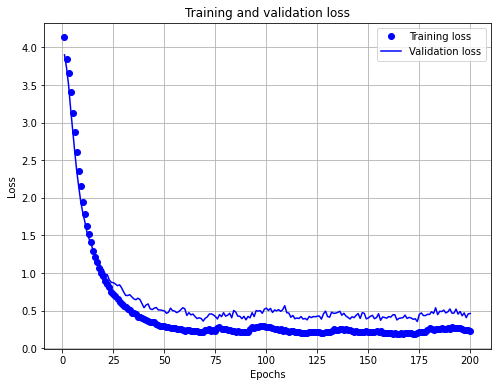

In [61]:
# Plot traing loss and validation loss
plot_loss(history_grid)

# Evaluate model by using validation set.
print(model_grid.evaluate(X_val,y_val))

## 3. Model Evaluation
**Evaluate the model per test set by checking confusion matrix, classification report, accuracy score and cohen kappa score.**

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

In [63]:
# Get predictions from the model.
pred = model_grid.predict(X_test)

# Print model performance: Confusion matrix, accuracy score and classification report.
print('Confusion matrix: \n', confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n')
print('Classification report: \n', classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n') 
print('Accuracy on test set: ', accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)), '\n')
print('cohen_kappa score：',cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))

Confusion matrix: 
 [[33  0  4  0]
 [ 0 39  3  1]
 [ 0  2 62  4]
 [ 0  1  0 51]] 

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.93      0.91      0.92        43
           2       0.90      0.91      0.91        68
           3       0.91      0.98      0.94        52

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200
 

Accuracy on test set:  0.925 

cohen_kappa score： 0.8978514760461711


## 4. Save model

In [28]:
# Import necessary libraries
from tensorflow.keras.models import load_model

In [64]:
# Save trained model with help of keras.
model_grid.save('Model/NNTaskB.h5')